# Check possibility to remove the subset path 

In [2]:
from omsapi import OMSAPI
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
import math

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
omsapi = OMSAPI(api_url="https://vocms0185.cern.ch/agg/api", api_version="v1", cert_verify=False)
omsapi.auth_oidc("oms-api-client", "4577f6da-bbf7-4f5e-a898-f8db325e7e5e", audience="cmsoms-int-0185")

In [4]:
dataset_name='SingleMuon'
q_dataset=omsapi.query("datasetrates").paginate(page=1,per_page=1000).filter("run_number",315721).filter("dataset_name",dataset_name)
response_dataset=q_dataset.data()
folded_json_dataset=response_dataset.json()
df_singlemuon=pd.json_normalize(folded_json_dataset['data'])
df_singlemuon.set_index('attributes.first_lumisection_number',inplace=True)
df_singlemuon=df_singlemuon[23:628]

https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][EQ]=315721&filter[dataset_name][EQ]=SingleMuon&page[offset]=0&page[limit]=1000


In [5]:
df_singlemuon_dict={}
path_name_list=['HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10', 
                'HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10', 
                'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_v13',
                'HLT_IsoMu24_eta2p1_v13',
                'HLT_IsoMu24_v11',
                'HLT_IsoMu27_v14',
                'HLT_IsoMu30_v2',
                'HLT_L1SingleMu18_v3',
                'HLT_L1SingleMu25_v2',
                'HLT_L2Mu10_v7',
                'HLT_L2Mu50_v2',
                'HLT_Mu10_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT350_PFMETNoMu60_v12',
                'HLT_Mu12_v1',
                'HLT_Mu15_IsoVVVL_PFHT450_CaloBTagCSV_4p5_v7',
                'HLT_Mu15_IsoVVVL_PFHT450_PFMET50_v13',
                'HLT_Mu15_IsoVVVL_PFHT450_v13',
                'HLT_Mu15_IsoVVVL_PFHT600_v17',
                'HLT_Mu15_v1',
                'HLT_Mu20_v11',
                'HLT_Mu27_v12',
                'HLT_Mu3_PFJet40_v14',
                'HLT_Mu50_IsoVVVL_PFHT450_v13',
                'HLT_Mu50_v12',
                'HLT_Mu55_v2',
                'HLT_Mu8_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT300_PFMETNoMu60_v13',
                'HLT_OldMu100_v3',
                'HLT_TkMu100_v2']
for i in path_name_list : 
    q = omsapi.query("hltpathrates").paginate(page=1, per_page=1000).filter("run_number",315721).filter("path_name",i)
    response=q.data()
    folded_json=response.json()
    df=pd.json_normalize(folded_json['data'])
    df.set_index('attributes.first_lumisection_number',inplace=True)
    df=df[23:628]
    df_singlemuon_dict[i]=df

https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1&page[offset]=0&page[limit]=1000


## List of paths

In [6]:
number = 0
for i in list(df_singlemuon_dict.keys()):
    print(number, i)
    number+=1
number_list=range(number)

0 HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10
1 HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10
2 HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10
3 HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10
4 HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1
5 HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10
6 HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1_v10
7 HLT_IsoMu20_v13
8 HLT_IsoMu24_eta2p1_v13
9 HLT_IsoMu24_v11
10 HLT_IsoMu27_v14
11 HLT_IsoMu30_v2
12 HLT_L1SingleMu18_v3
13 HLT_L1SingleMu25_v2
14 HLT_L2Mu10_v7
15 HLT_L2Mu50_v2
16 HLT_Mu10_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT350_PFMETNoMu60_v12
17 HLT_Mu12_v1
18 HLT_Mu15_IsoVVVL_PFHT450_CaloBTagCSV_4p5_v7
19 HLT_Mu15_IsoVVVL_PFHT450_PFMET50_v13
20 HLT_Mu15_IsoVVVL_PFHT450_v13
21 HLT_Mu15_IsoVVVL_PFHT600_v17
22 HLT_Mu15_v1
23 HLT_Mu20_v11
24 HLT_Mu27_v12
25 HLT_Mu3_PFJet40_v14
26 HLT_Mu50_IsoVVVL_PFHT450_v13
27 HLT_Mu50_v12

### Calculate some statistical representation of data in order to be able to compare 

coeffiecient of variation is the statistical measure helping in measuring the dispersion of the various data points in data series around the mean 
[Coeffiecient of variation](https://en.wikipedia.org/wiki/Coefficient_of_variation)

In [7]:
print ("{:^100} {:<10} {:^20} {:^10}".format('path_name','cv','mean','var'))
for i in df_singlemuon_dict.keys():
    path=df_singlemuon_dict[i]
    path["log_rate"]=np.log(path["attributes.rate"][0:550])
    var=path['log_rate'].var()
    mean=path['log_rate'].mean()
    cv="{:.2f}".format(math.sqrt(var)/mean)
    path_name=path['attributes.path_name'][33]
    print ("{:<100} {:<10}\t\t{:.2f}\t\t{:.2f}".format(path_name,cv,mean,var))
    #print(path['log_rate'])

                                             path_name                                               cv                 mean            var    
HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10                                 0.24      		1.13		0.08
HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10                                         0.23      		1.21		0.07
HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10                                0.21      		1.25		0.07
HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10                                        0.20      		1.32		0.07
HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1                                       0.19      		1.41		0.07
HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10                                 0.18      		1.44		0.07
HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1_v10                                         0.17      	

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Select the significant paths

In [50]:
def plot(number_list,path_check='',dataset=True,check_acf=True,show_path_name=True):
    # This is the plot for comparing the path data 
    # the first plot will show the rate vs lumisection graph
    # the second plot will represent the trend of rate 
    # the first two plot will plot in log scale
    # the third plot will be the autocorrelation function of the rate 
    # the fourth plot will demonstrate the histogram of rate data
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(30,30))
    # define a variable used in calculation
    dataset_rate = df_singlemuon["attributes.rate"] 
    key_list = list(df_singlemuon_dict.keys()) #list of path name 
    for i in number_list:
        path_rate = df_singlemuon_dict[key_list[i]]["attributes.rate"]
        path_name = df_singlemuon_dict[key_list[i]]["attributes.path_name"][100]
        if show_path_name==False : 
            ax1.plot(path_rate)
            ax2.plot(path_rate.rolling(window=50).mean())
            ax3.plot(acf(path_rate,nlags=600,fft=False))
        else : 
            ax1.plot(path_rate,label=path_name)
            ax2.plot(path_rate.rolling(window=50).mean(),label=path_name)
            ax3.plot(acf(path_rate,nlags=600,fft=False),label=path_name)
        ax4.hist(path_rate,bins = 50)
        if dataset == True :
            ax1.plot(dataset_rate,label='SingleMuon',color='black',ls='--')
            ax2.plot(dataset_rate.rolling(window=50).mean(),label='SingleMuon')
            ax3.plot(acf(dataset_rate,nlags=600,fft=False),label='SingleMuon')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax1.set_xlim(-10,700)
    ax2.set_xlim(-10,700)
    ax1.set_ylim(0.001,1000)
    ax2.set_ylim(0.001,1000)
    ax4.set_ylim(0,100)
    ax1.set_title('Observation')
    ax2.set_title('Trend')
    ax3.set_title('Autocorrelation Fucntion')
    ax4.set_title('Histogram of Rate')
    ax1.legend(loc=1,title=('Run 315721\nDataset : SingleMuon\n Path :'+path_check))
    ax2.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
    ax3.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
    ax4.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
    plt.tight_layout()
    pass
            
        
        

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


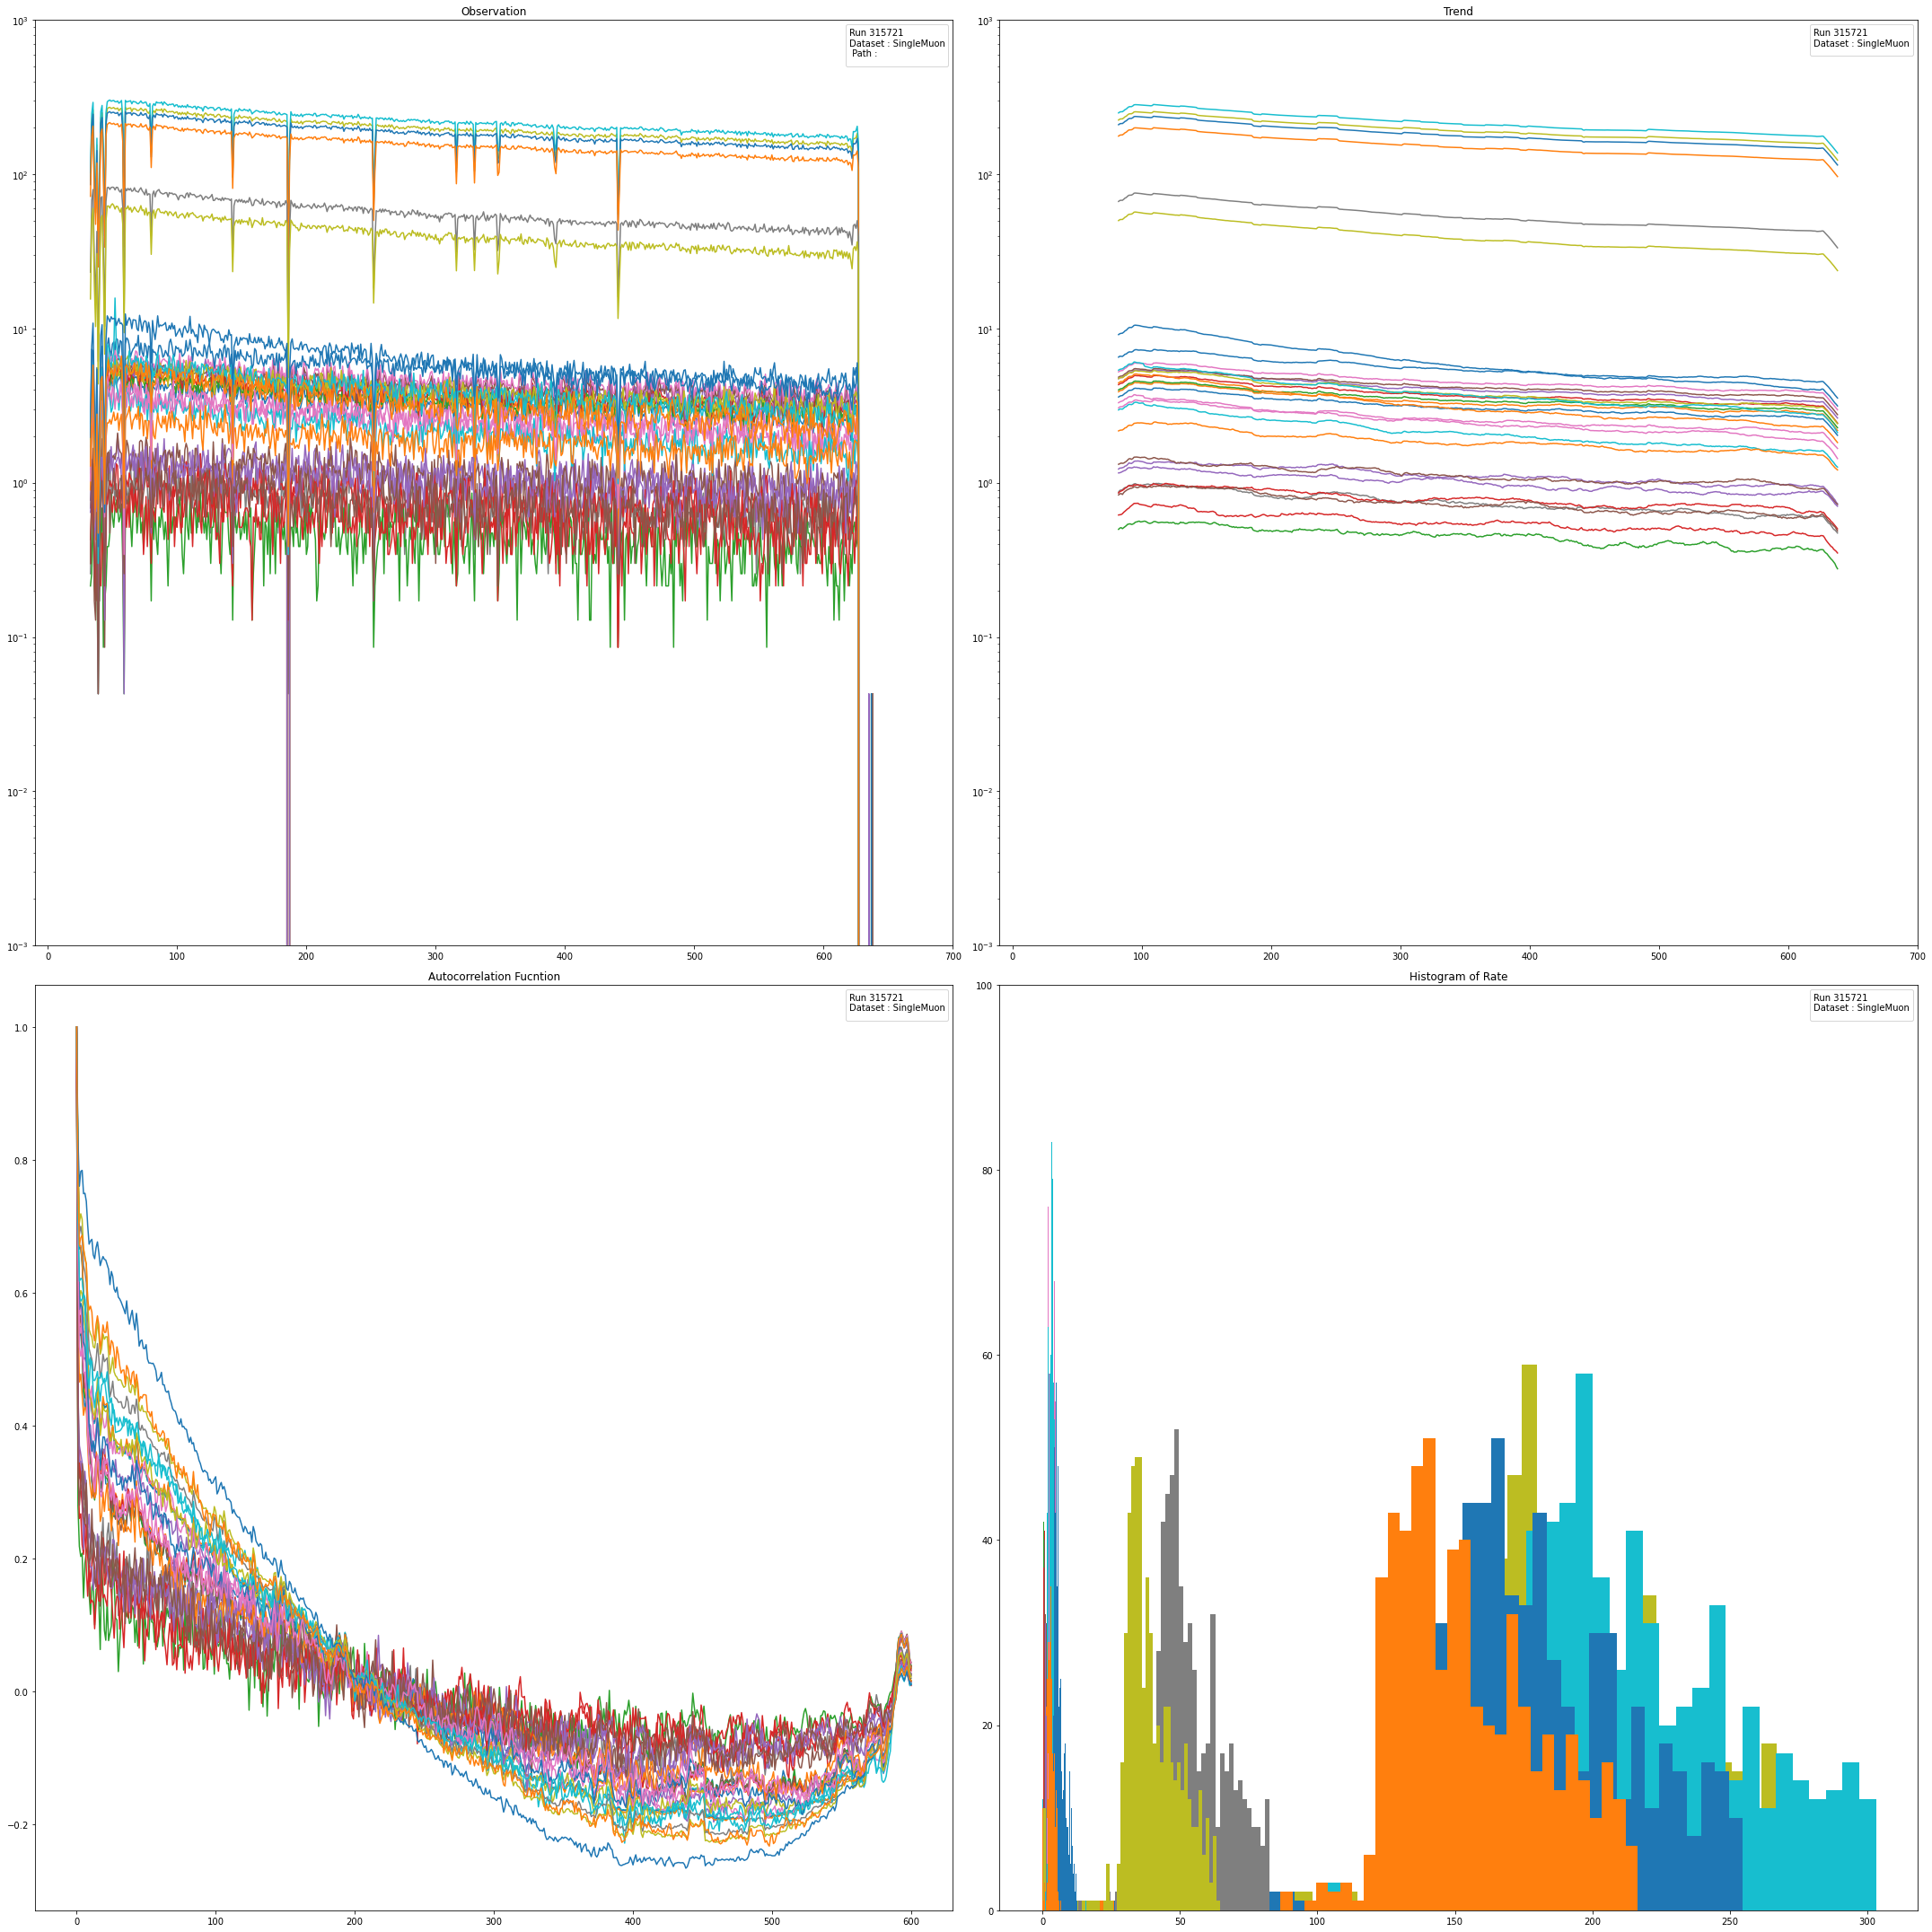

In [51]:
plot(range(32),dataset=False,show_path_name = False)

In [52]:
print ("{:^100} {:<10} {:^20} {:^10}".format('path_name','cv','mean','var'))
for i in df_singlemuon_dict.keys():
    path=df_singlemuon_dict[i]
    path["rate"]=(path["attributes.rate"][0:550])
    var=path['rate'].var()
    mean=path['rate'].mean()
    cv="{:.2f}".format(math.sqrt(var)/mean)
    path_name=path['attributes.path_name'][33]
    if mean >= 25 :
        print("{:<100} {:<10}\t\t{:.2f}\t\t{:.2f}".format(path_name,cv,mean,var))
    #print(path['log_rate'])

                                             path_name                                               cv                 mean            var    
HLT_IsoMu24_eta2p1_v13                                                                               0.19      		198.41		1413.65
HLT_IsoMu24_v11                                                                                      0.19      		220.60		1745.26
HLT_IsoMu27_v14                                                                                      0.19      		184.61		1234.70
HLT_IsoMu30_v2                                                                                       0.19      		155.53		886.50
HLT_Mu50_v12                                                                                         0.22      		55.68		152.83
HLT_Mu55_v2                                                                                          0.24      		40.74		94.16


/tmp/ipykernel_576/3221812727.py:7: RuntimeWarning: invalid value encountered in double_scalars
  cv="{:.2f}".format(math.sqrt(var)/mean)


## Detail check

No handles with labels found to put in legend.


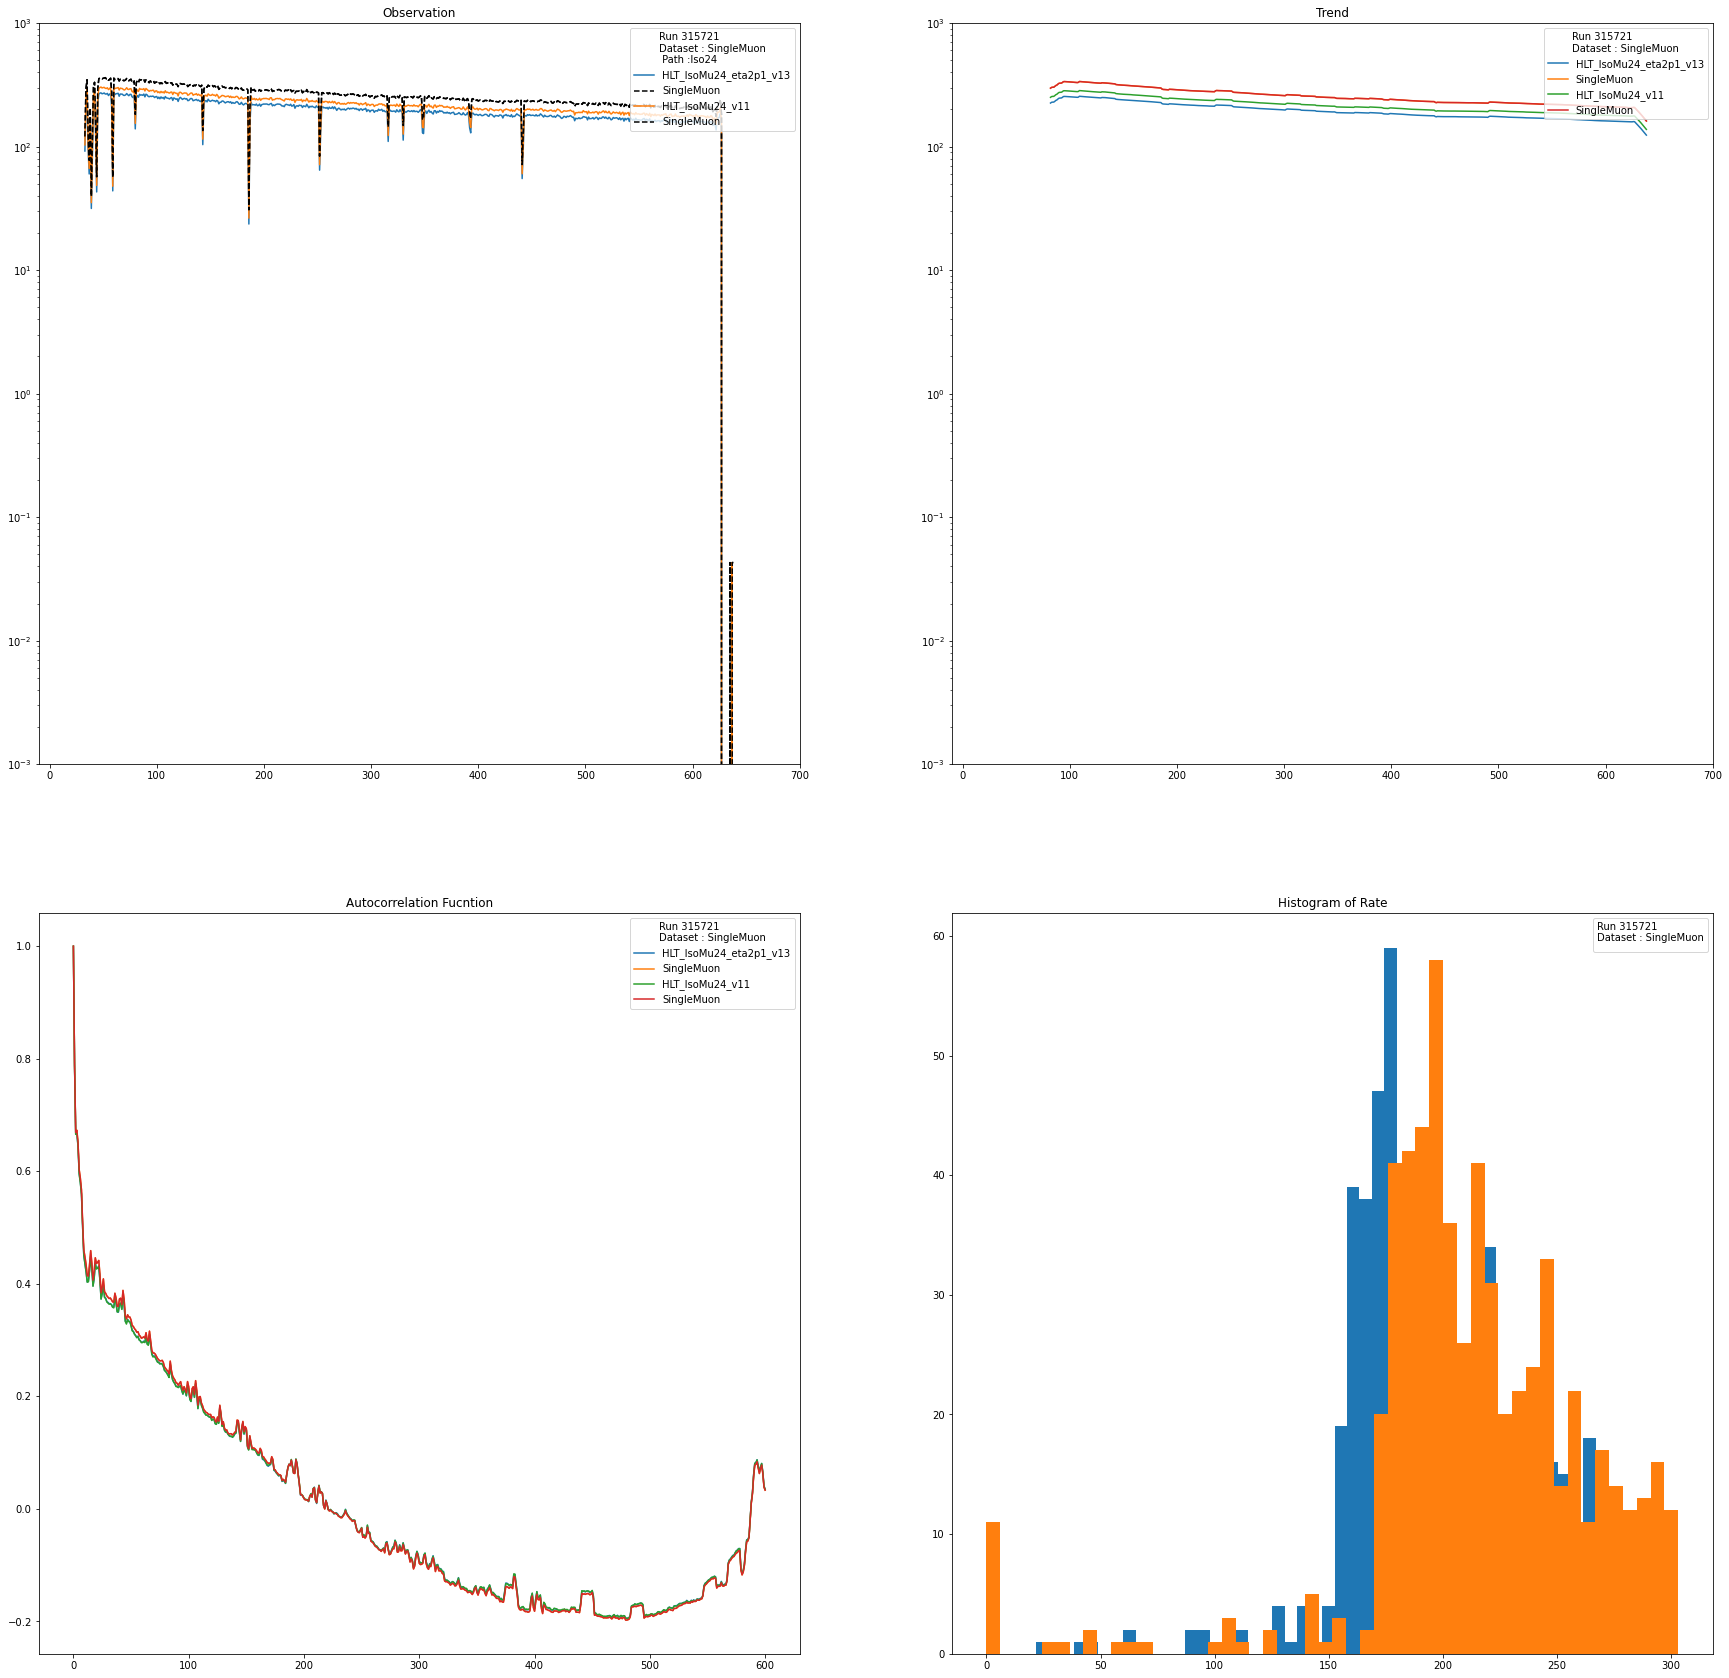

In [22]:
plot(range(8,10),path_check='Iso24')

No handles with labels found to put in legend.


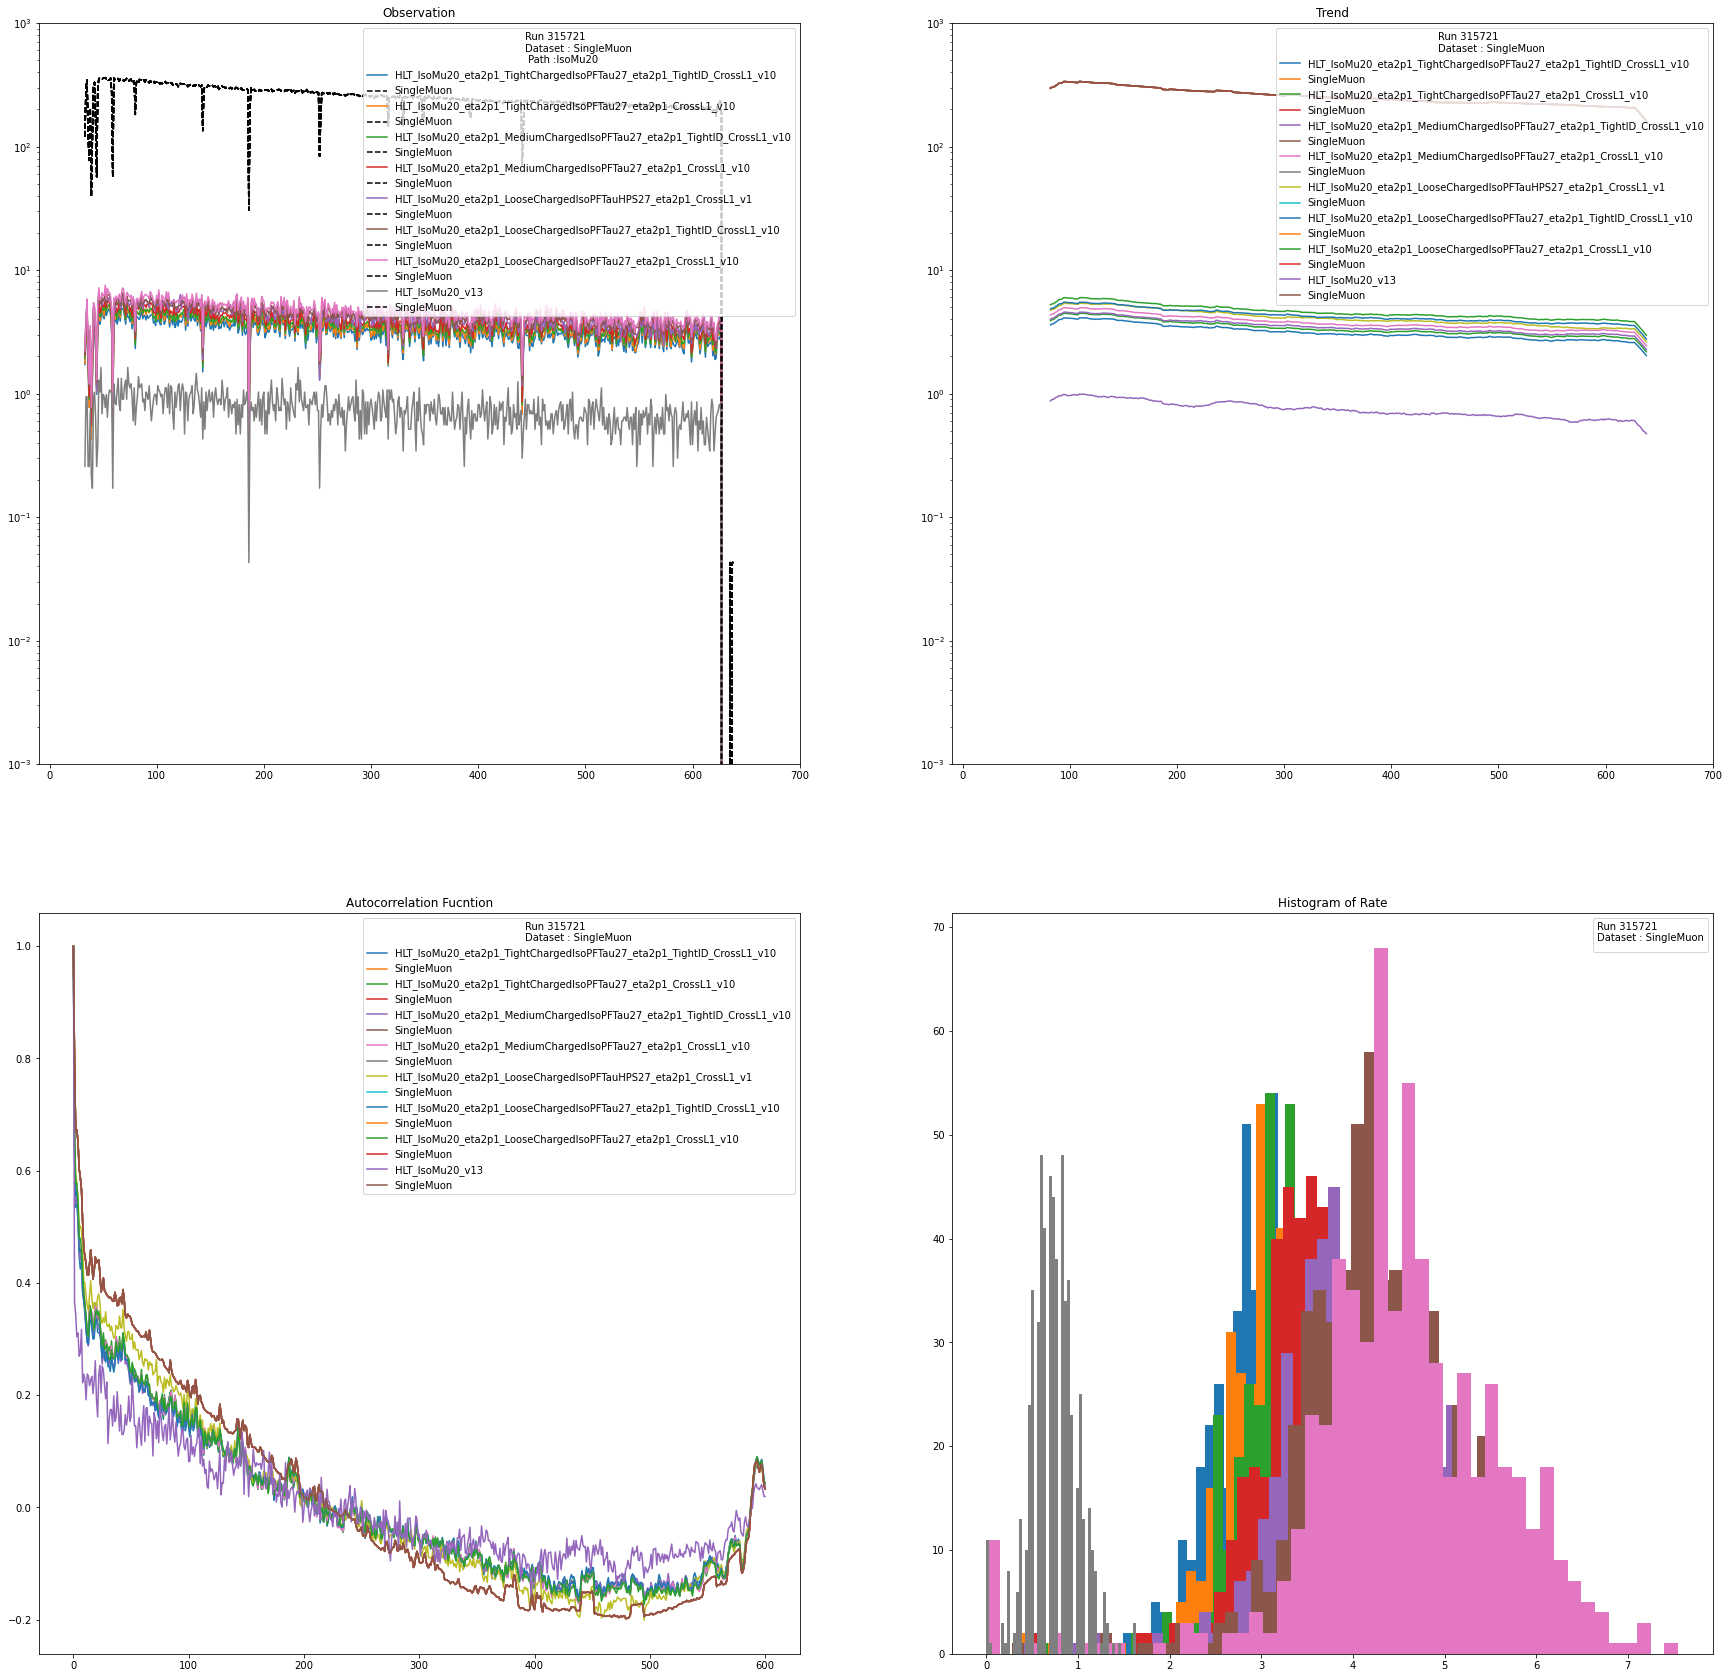

In [23]:
plot(range(0,8),path_check='IsoMu20')

No handles with labels found to put in legend.


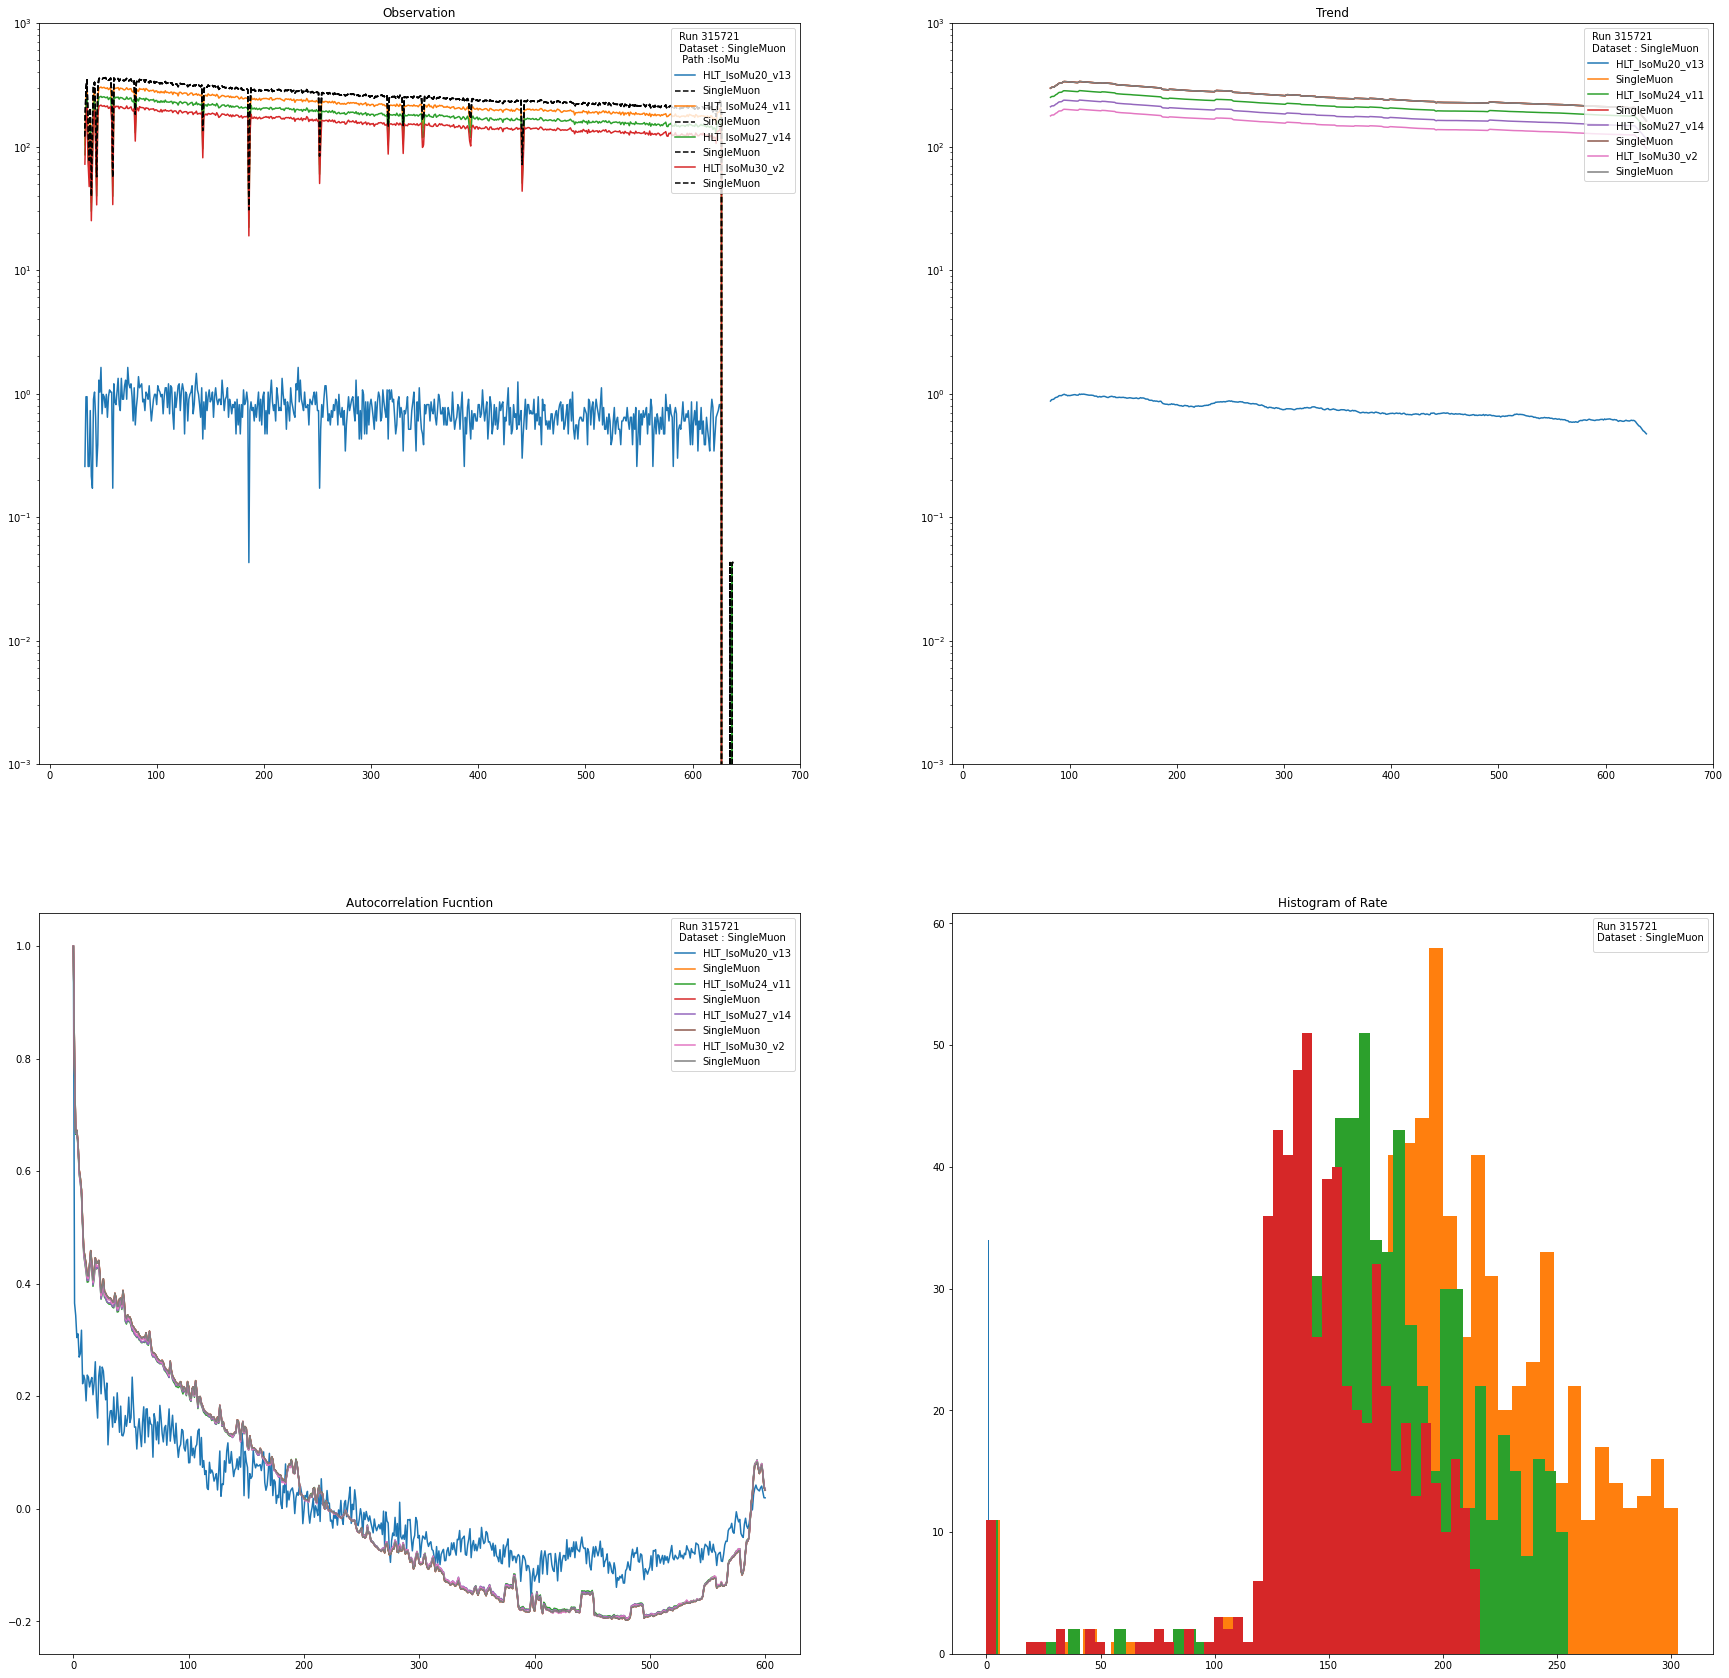

In [24]:
plot([7,9,10,11],path_check='IsoMu')

No handles with labels found to put in legend.


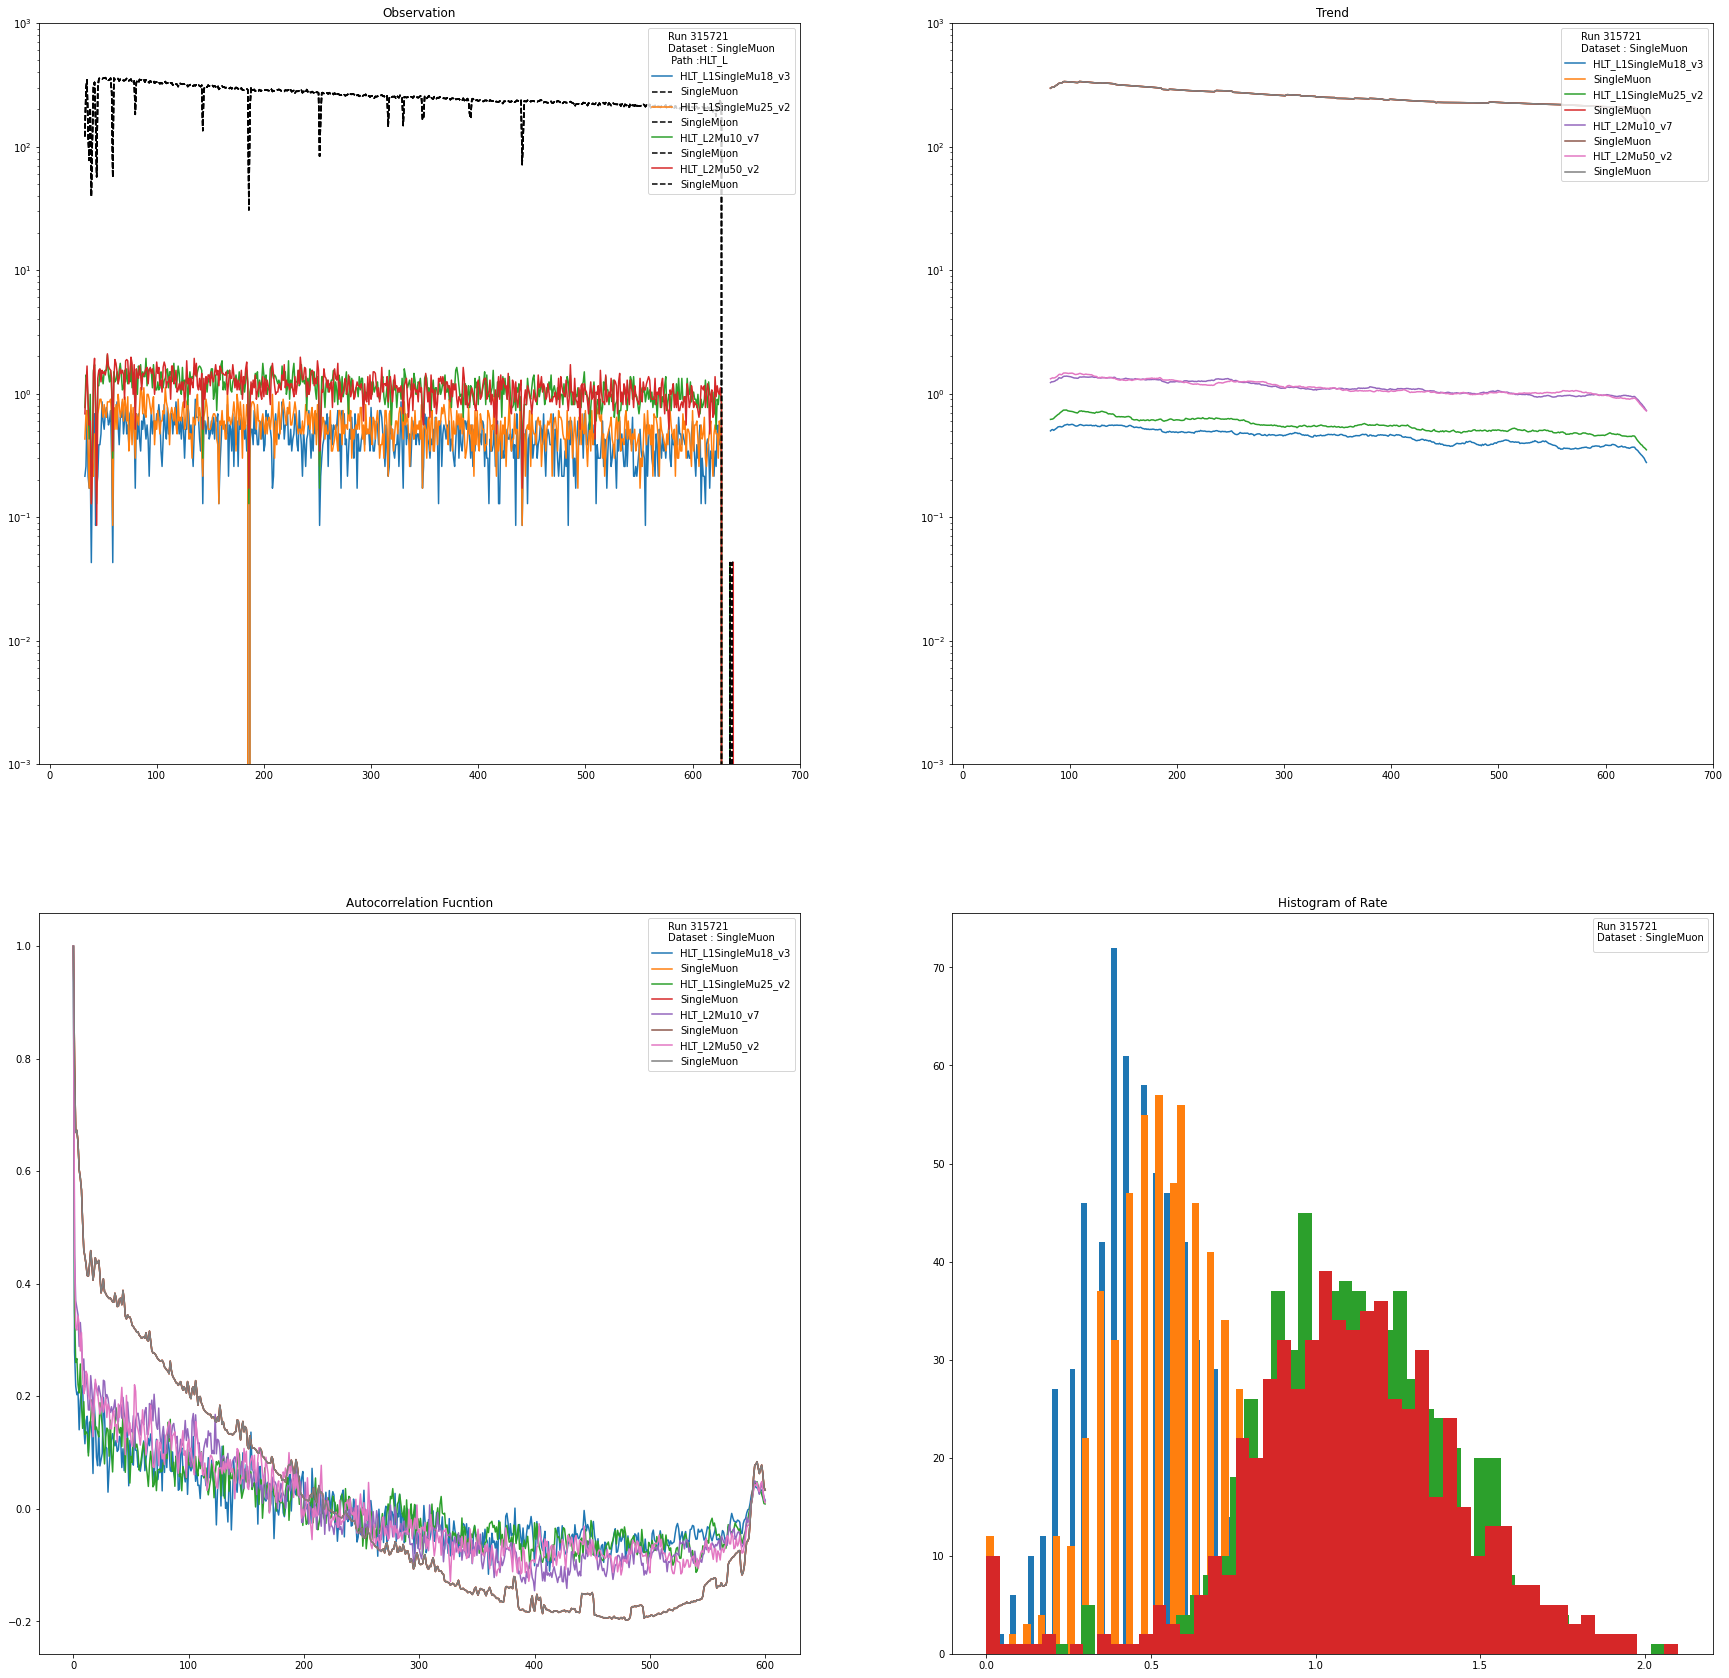

In [25]:
plot([12,13,14,15],path_check='HLT_L')

No handles with labels found to put in legend.


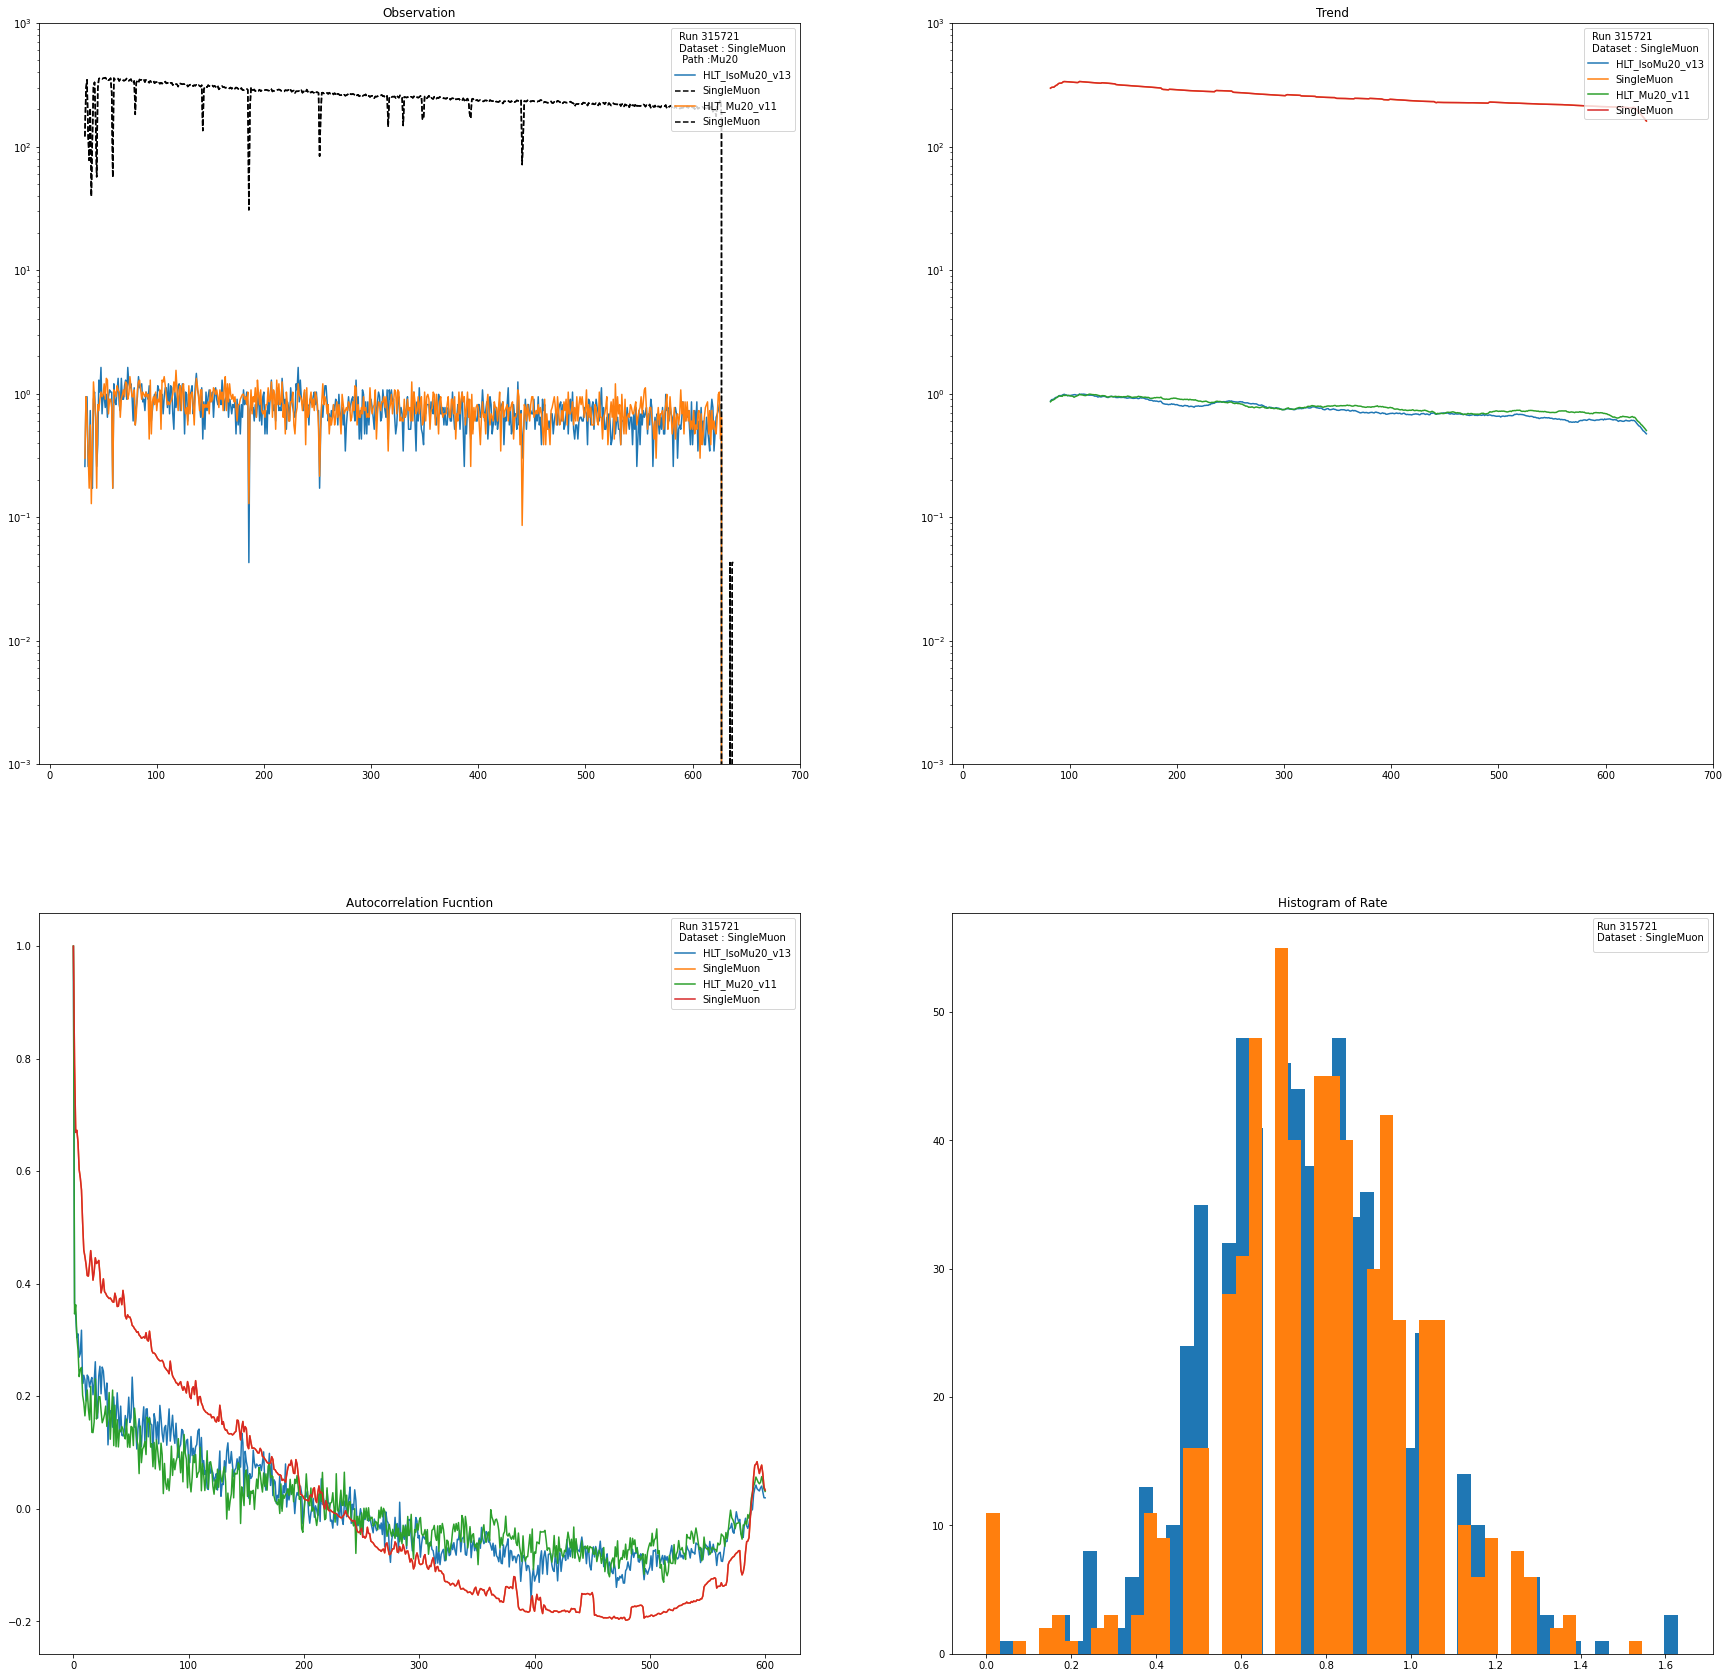

In [26]:
plot([7,23],path_check='Mu20')

No handles with labels found to put in legend.


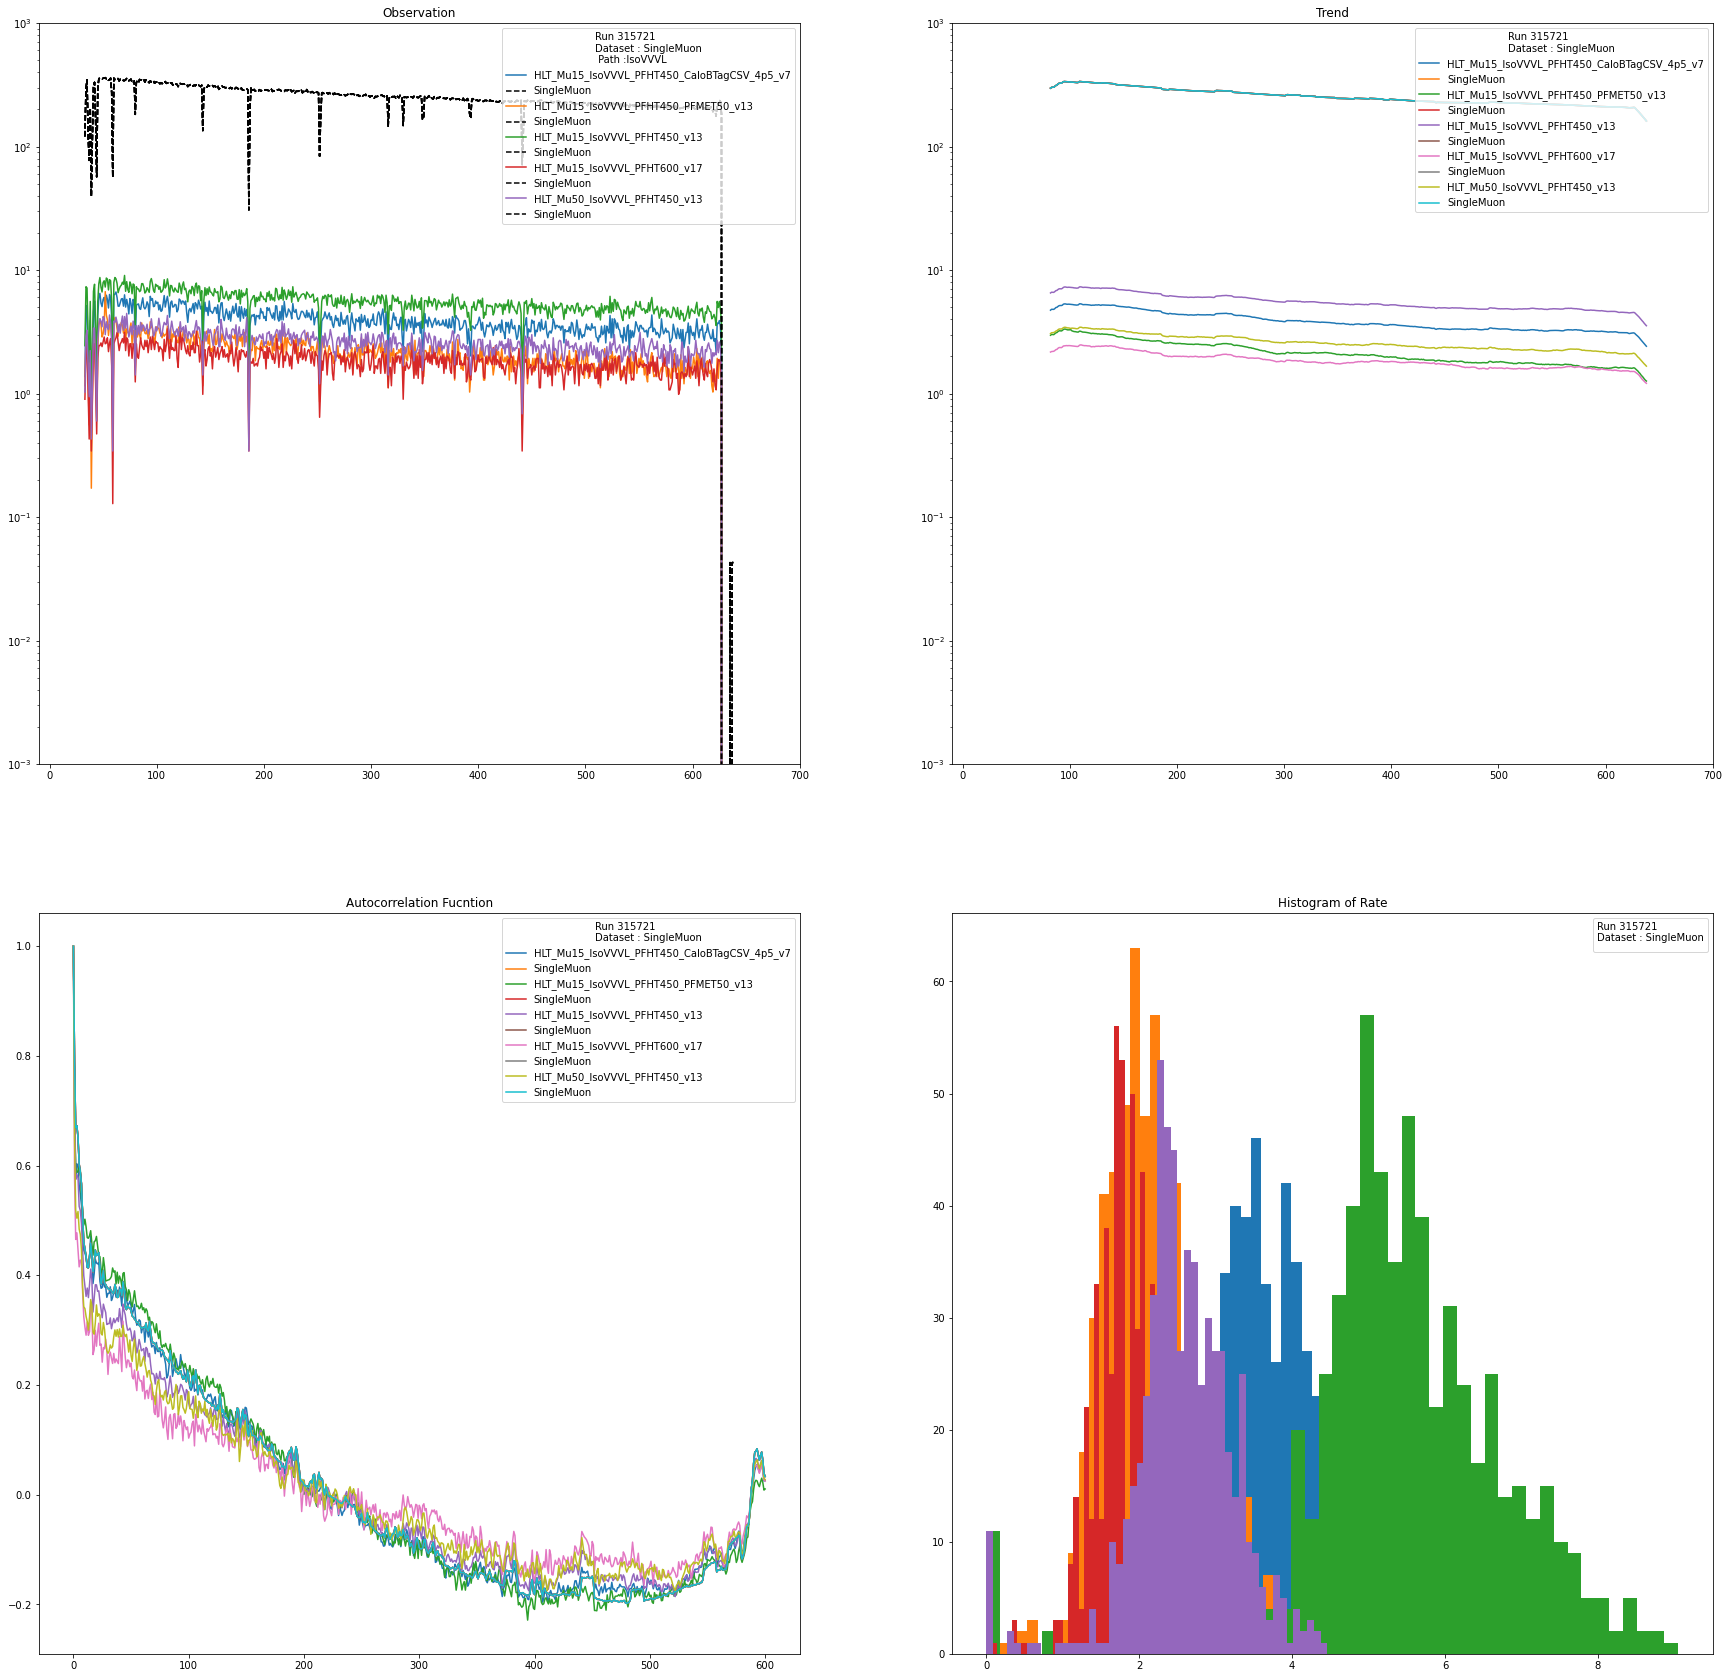

In [27]:
plot([18,19,20,21,26],path_check='IsoVVVL')

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
No handles with labels found to put in legend.


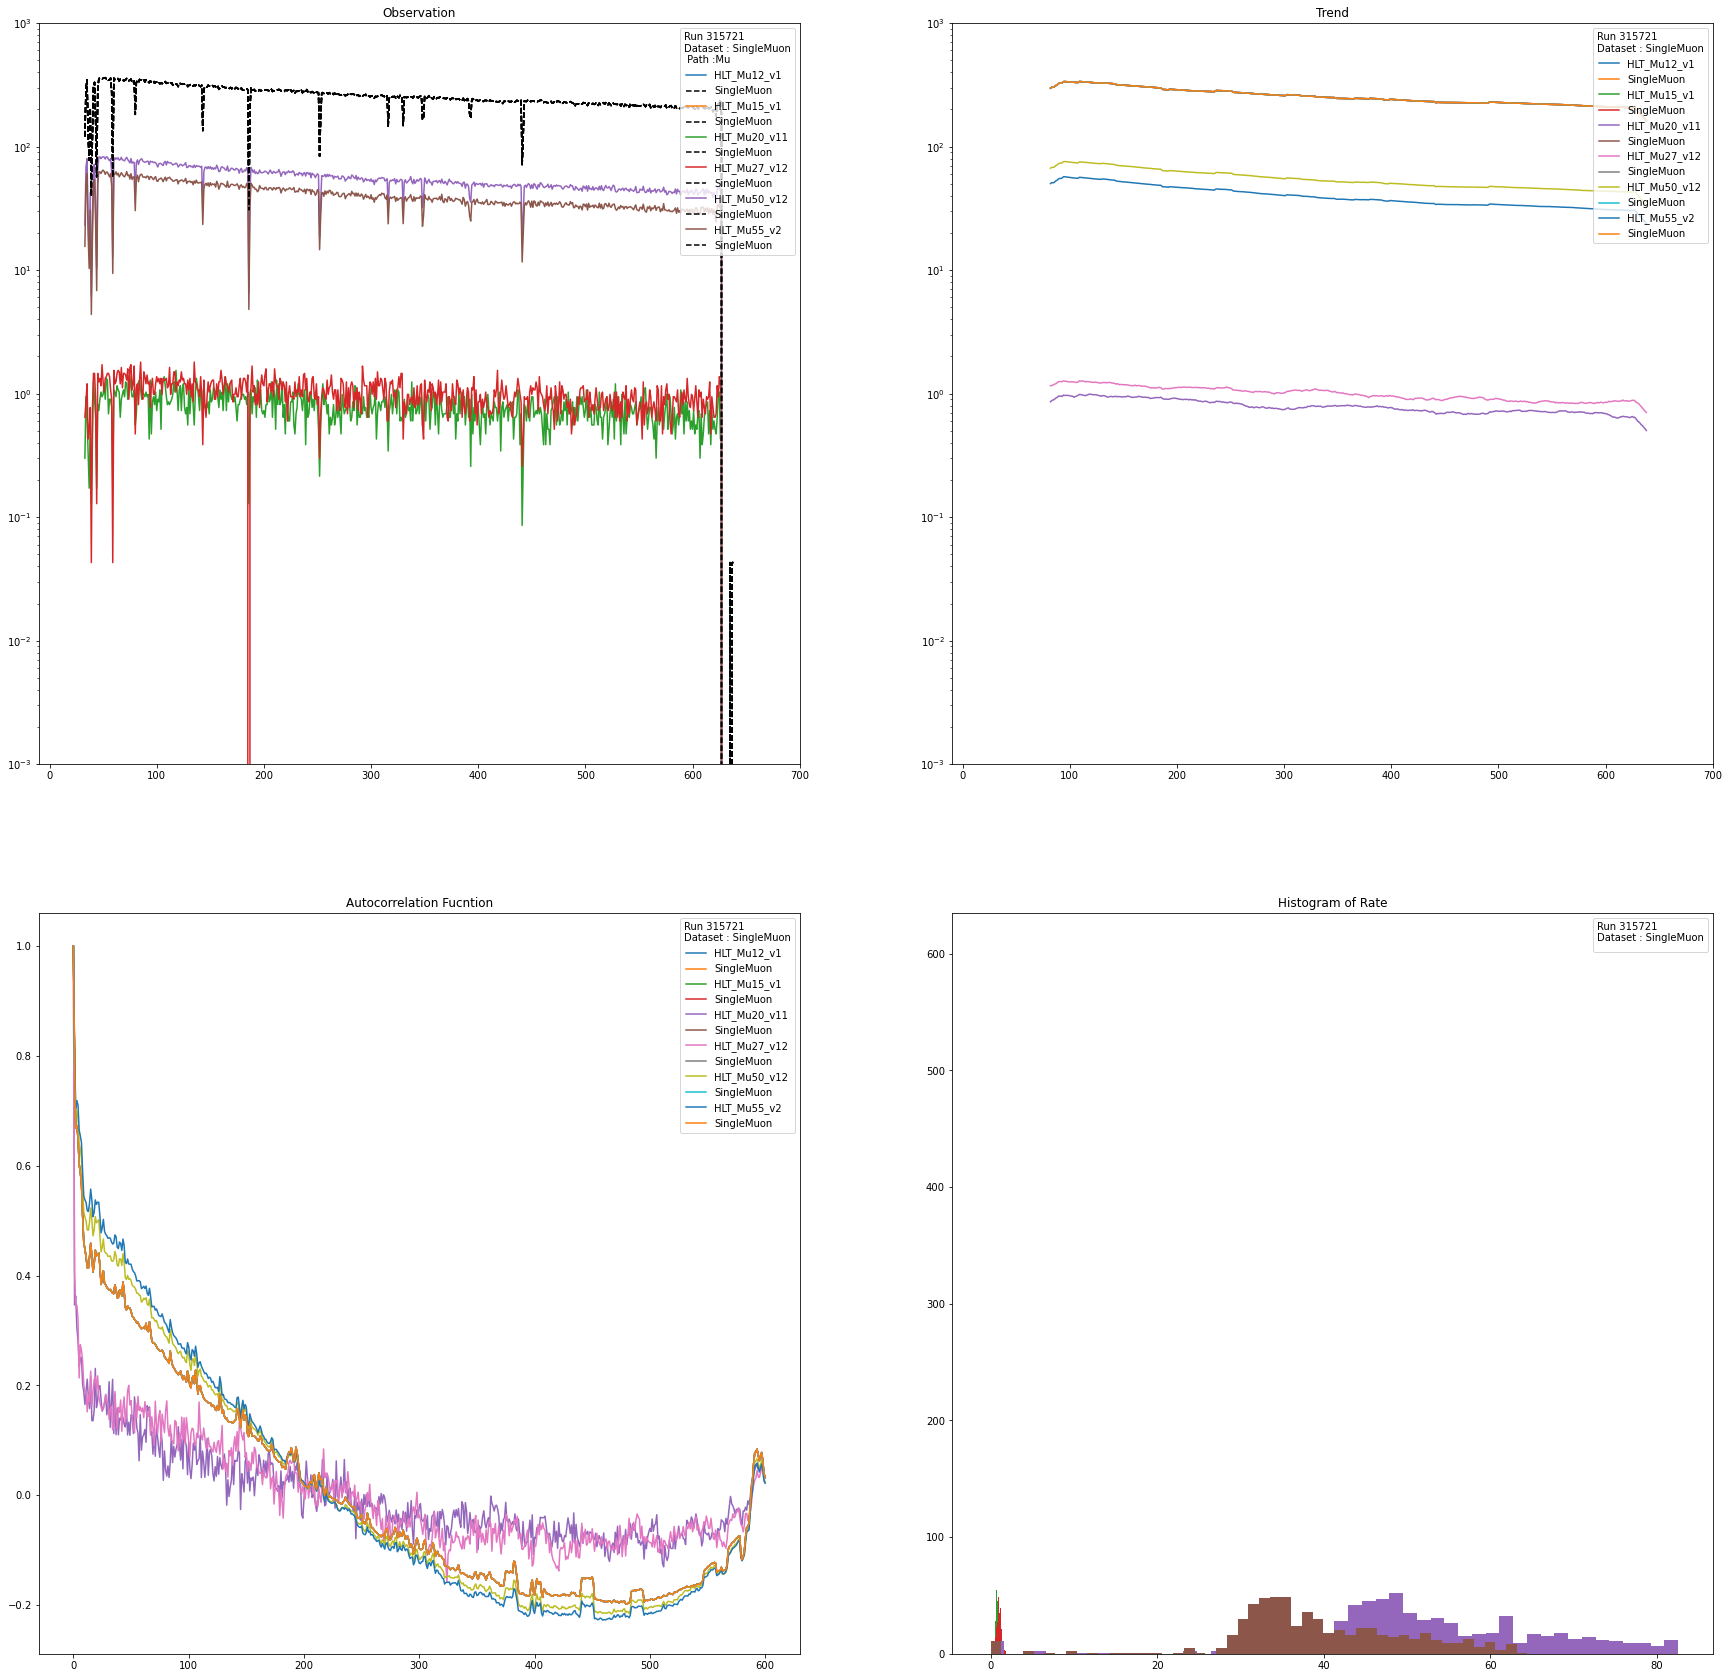

In [28]:
plot([17,22,23,24,27,28],path_check='Mu')

No handles with labels found to put in legend.


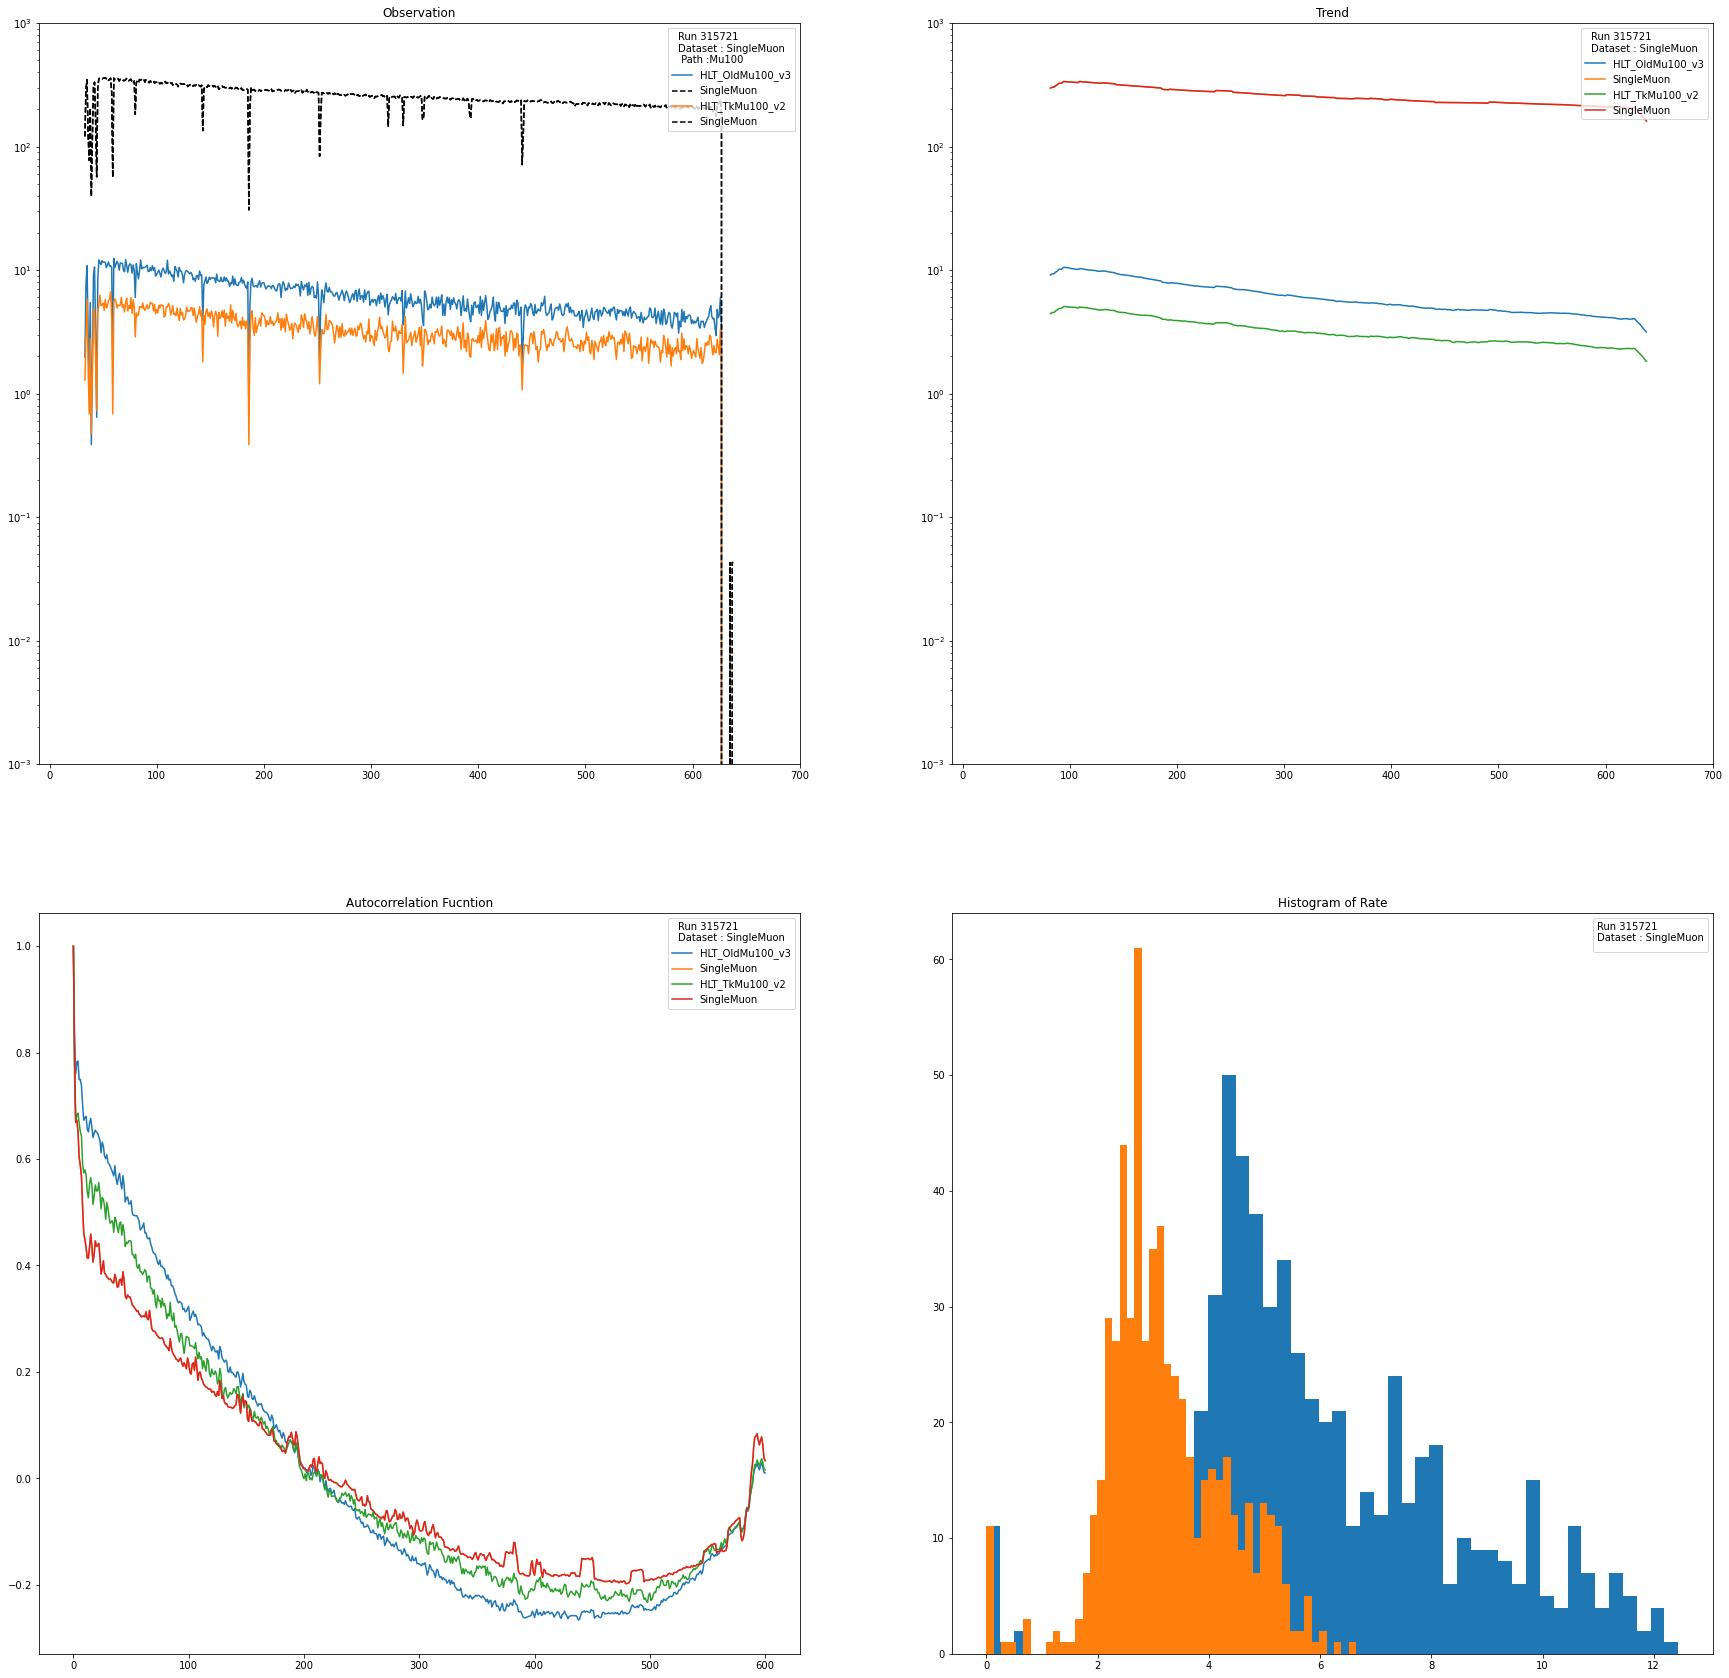

In [29]:
plot([30,31],path_check='Mu100')

No handles with labels found to put in legend.


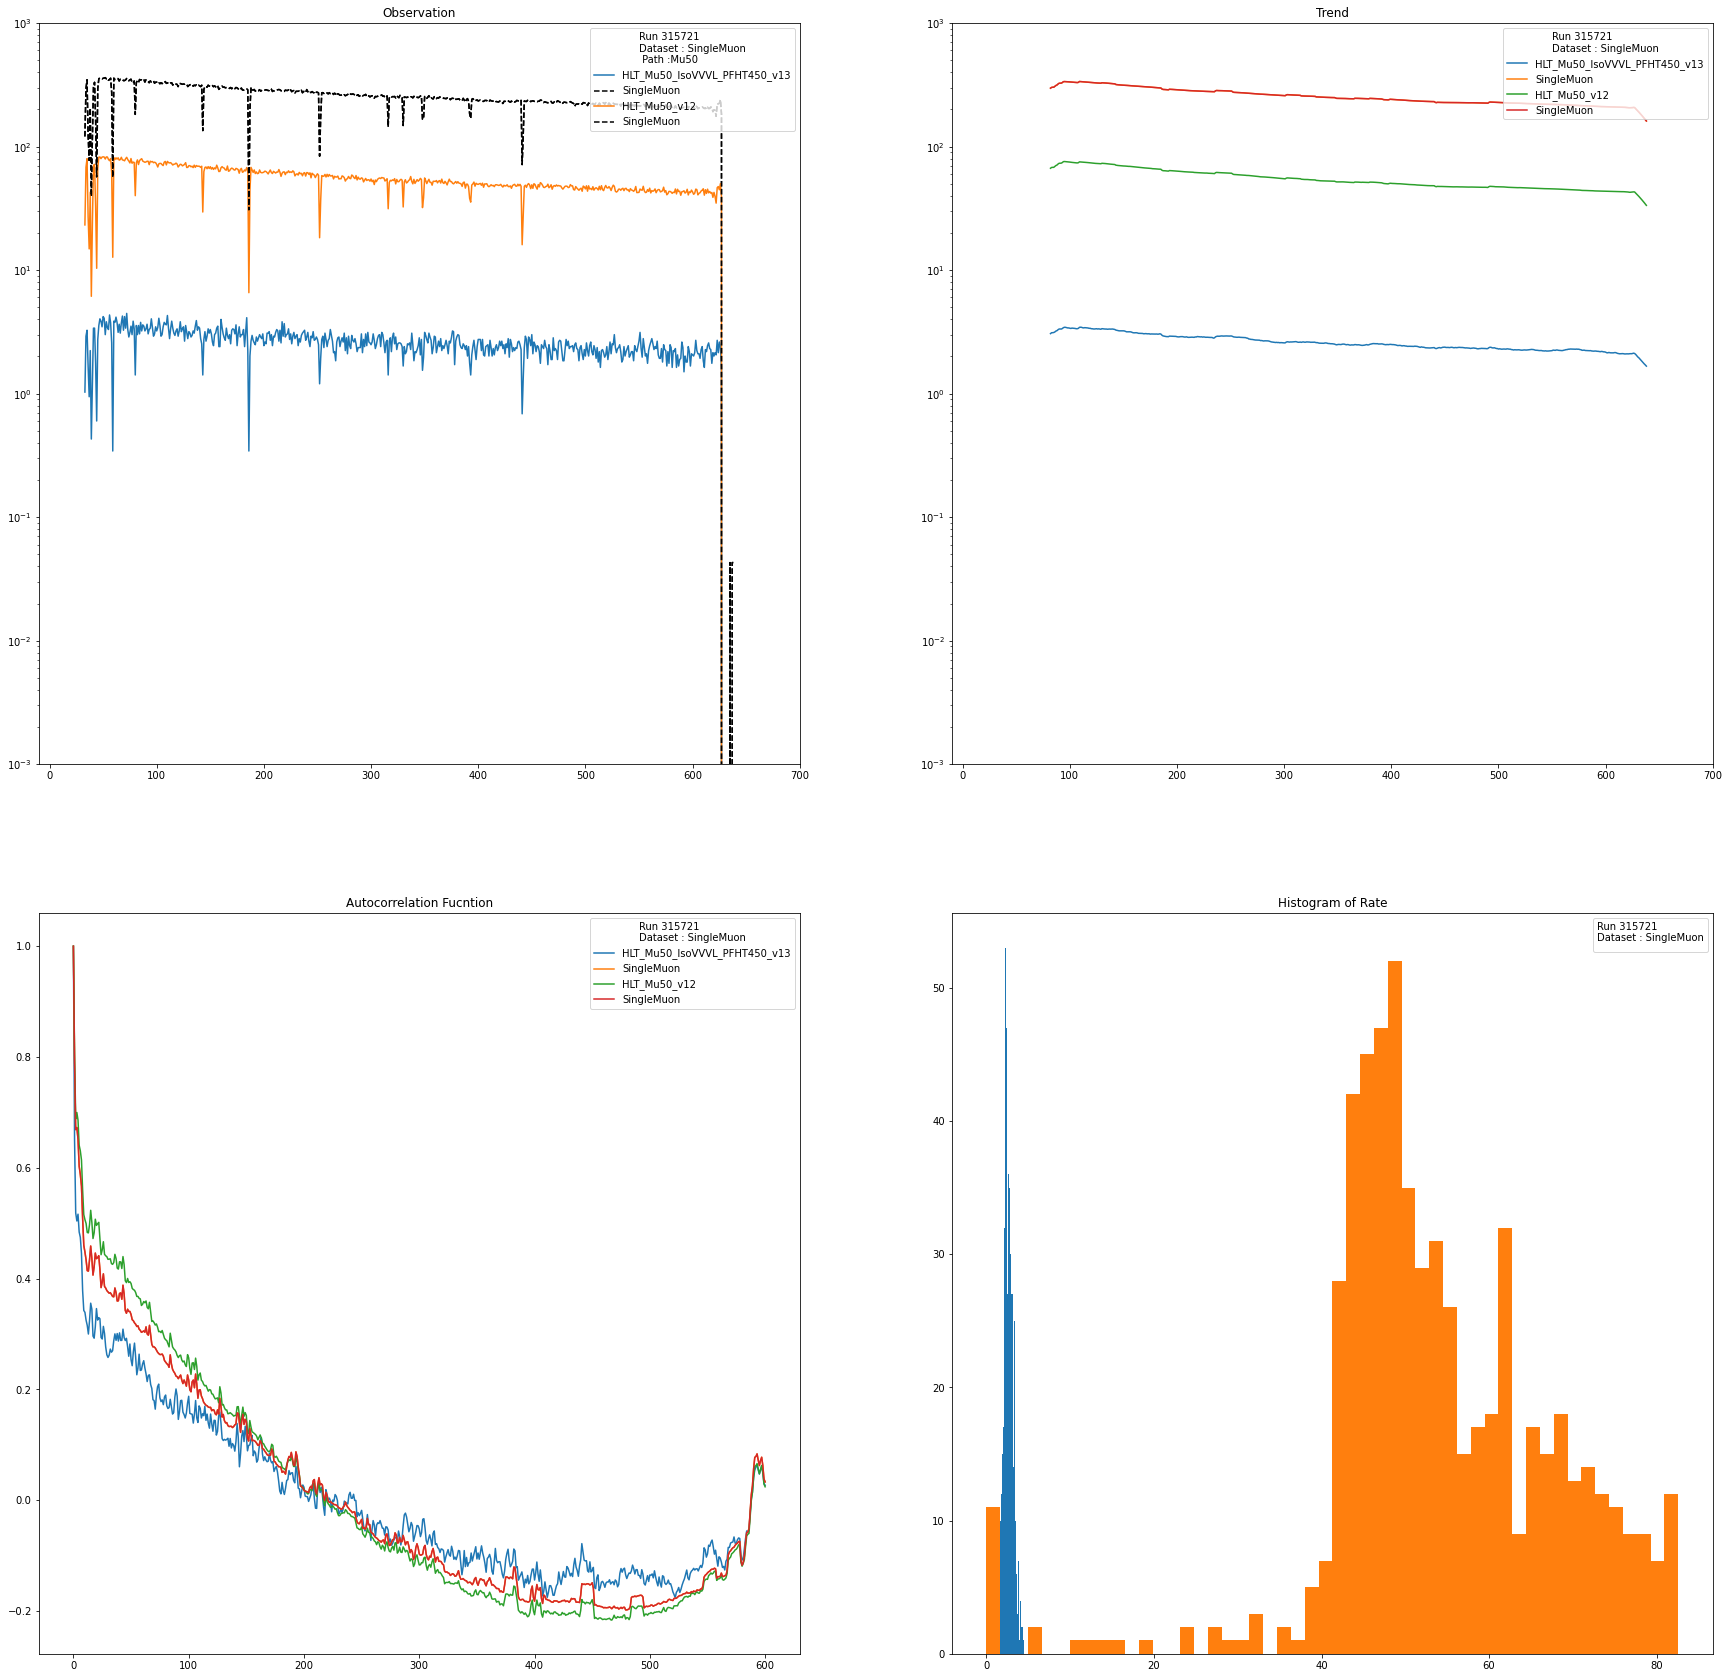

In [30]:
plot([26,27],path_check='Mu50')

No handles with labels found to put in legend.


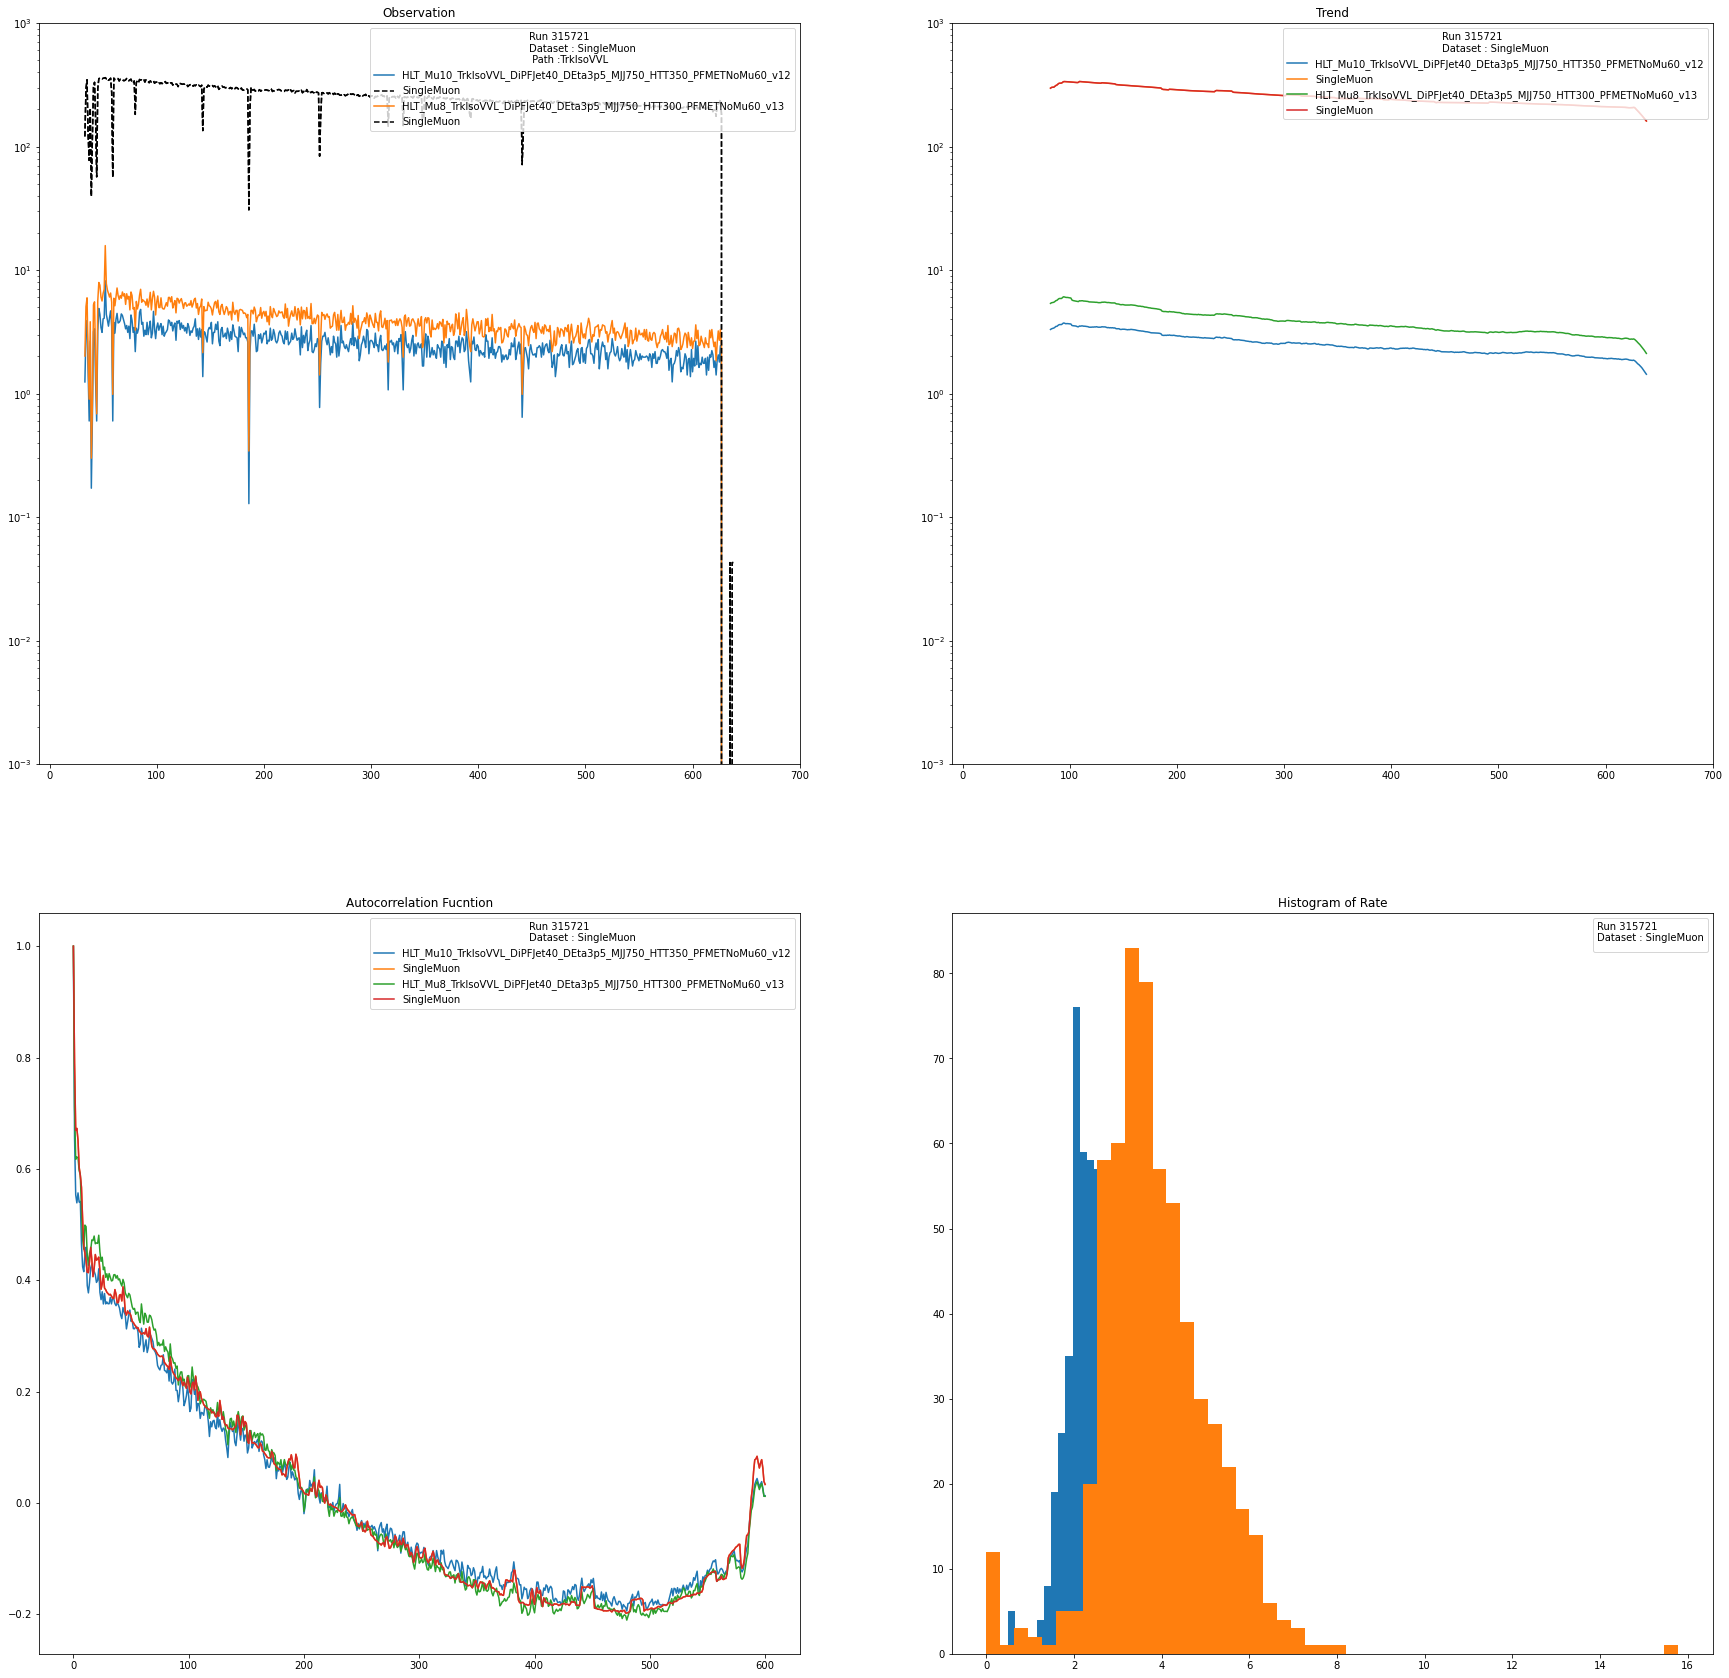

In [31]:
plot([16,29],path_check='TrkIsoVVL')

No handles with labels found to put in legend.


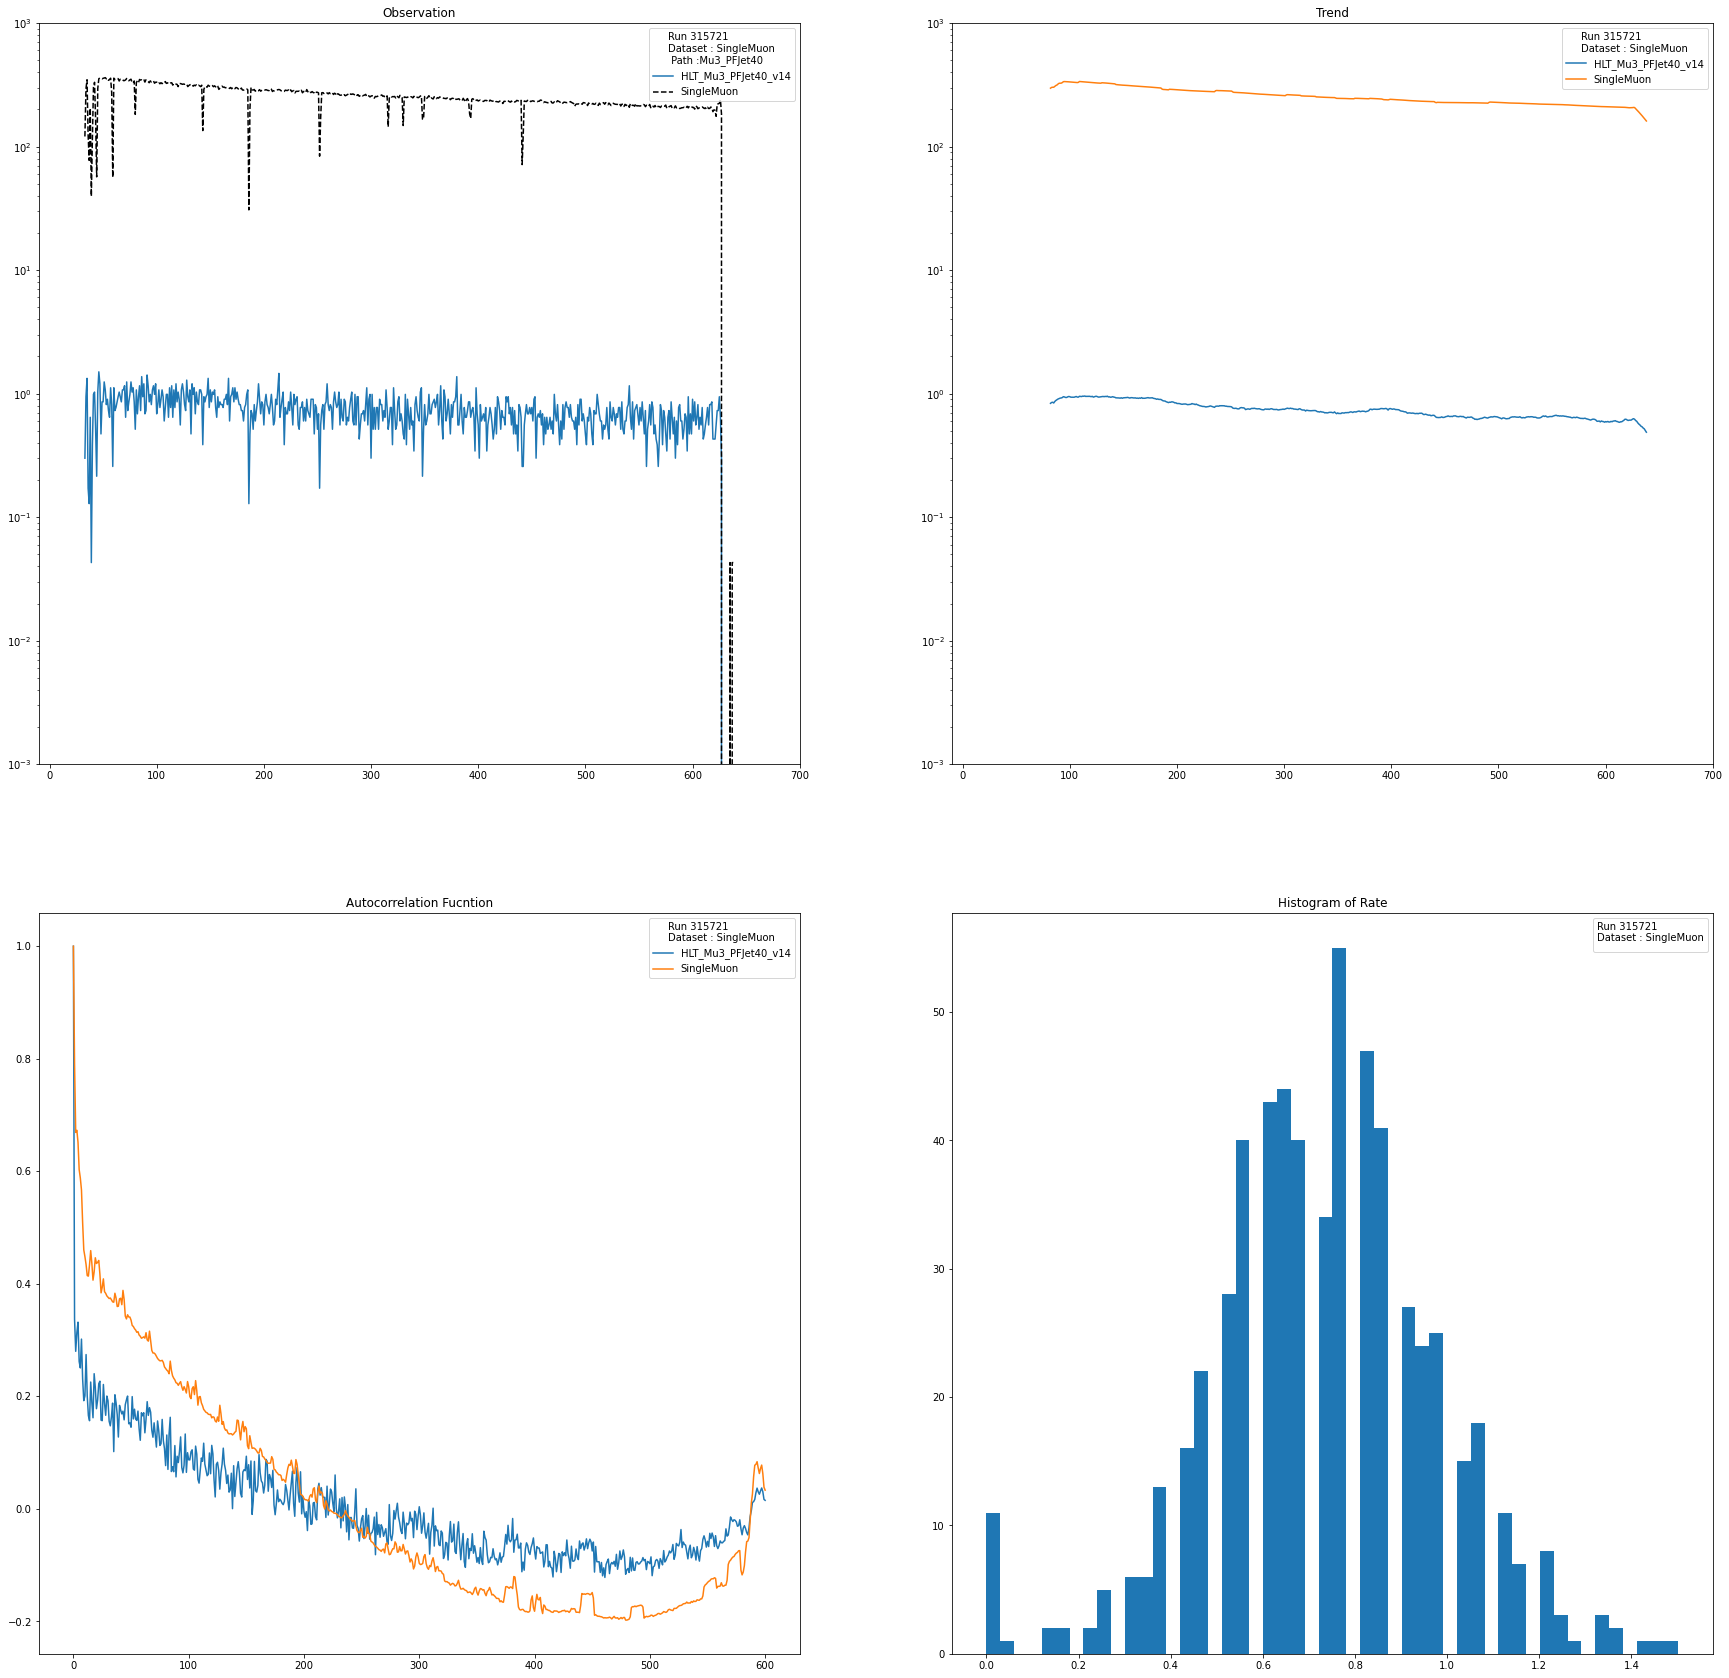

In [32]:
plot([25],path_check='Mu3_PFJet40')